# Imports

In [1]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=a27a305c95d78dbb40fbe09f7dafde16ed75625fd44a7b6addd520845ddd10d3
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder, MinMaxScaler
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import time
import math
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, auc

In [3]:
roc_auc_list = []

# Load Dataset


Future Work:
1. While taking anomalies try to pick from different class. If choosen randomly since Smurf class is high in numbers than all other classes (pick few rows from each classes)
2. Do the encoding in the beginning

In [4]:
file_path = '/content/drive/MyDrive/Dataset/kddcup.data_10_percent_corrected'

# Load the ARFF file into a DataFrame
dataframe = pd.read_csv(file_path, header=None)

In [5]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
dataframe.shape

(494021, 42)

In [7]:
# Drop all rows with missing values
dataframe.dropna(inplace=True, axis=1)

In [8]:
dataframe.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes',
              'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
              'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
              'num_shells','num_access_files','num_outbound_cmds','is_host_login',
              'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
              'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
              'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
              'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
              'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
              'dst_host_srv_rerror_rate','Class']

In [9]:
dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


# Data Analysis

In [10]:
# Assuming df is your DataFrame
for column in dataframe.columns:
    print(f"Value counts for column: {column}")
    print(dataframe[column].value_counts())
    print("\n")

Value counts for column: duration
duration
0        481671
1          2476
2           870
3           625
5           554
          ...  
18185         1
4283          1
2154          1
1007          1
120           1
Name: count, Length: 2495, dtype: int64


Value counts for column: protocol_type
protocol_type
icmp    283602
tcp     190065
udp      20354
Name: count, dtype: int64


Value counts for column: service
service
ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: count, Length: 66, dtype: int64


Value counts for column: flag
flag
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, dtype: int64


Value counts for column: src_bytes
src_bytes
1032     228035
0        115342
520    

In [11]:
# Drop columns having only 1 value
dataframe.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)

In [12]:
# Columns to be dropped
columns_to_drop = ['num_outbound_cmds', 'is_host_login']

In [13]:
dataframe.shape

(494021, 40)

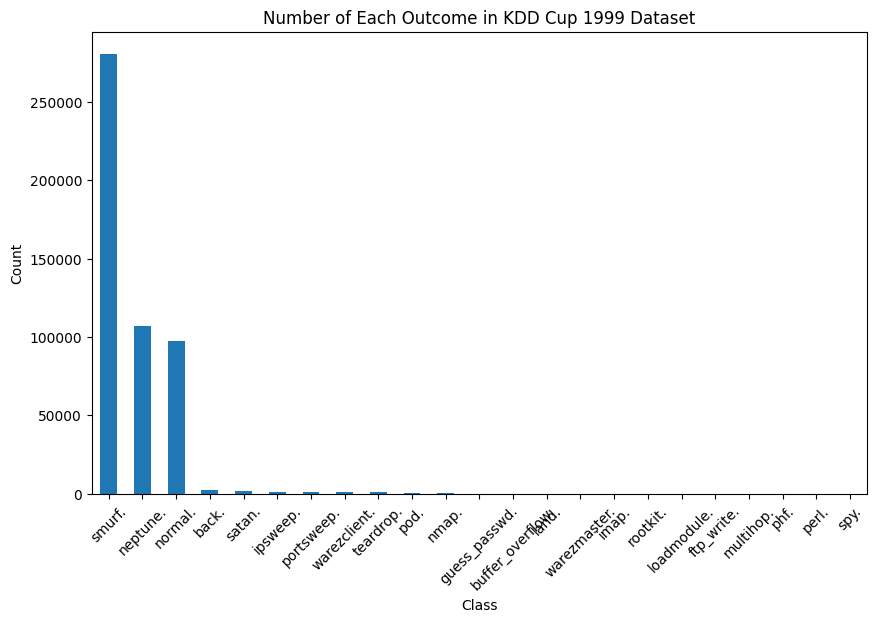

In [14]:
# compare each outcome
# Create a bar graph for the 'outcome' column
outcome_counts = dataframe['Class'].value_counts()

plt.figure(figsize=(10, 6))
outcome_counts.plot(kind='bar')
plt.title('Number of Each Outcome in KDD Cup 1999 Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Convert 'Class' to binary values: 0 for 'normal.' and 1 for all other classes
dataframe['Class'] = dataframe['Class'].apply(lambda x: 0 if x == 'normal.' else 1)
dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


Text(0, 0.5, 'Fraquency')

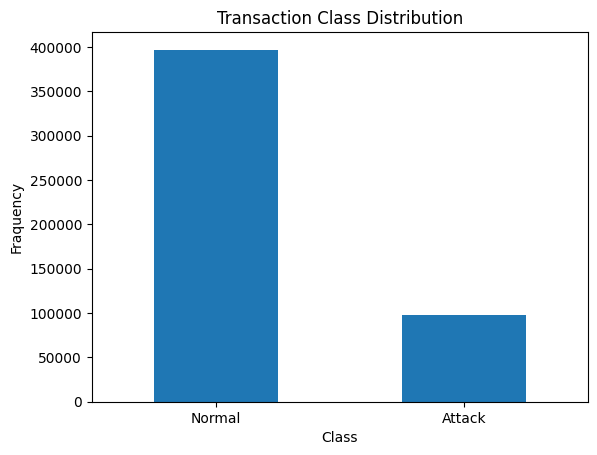

In [16]:
class_count = dataframe.Class.value_counts()

class_count.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
# Set labels on x-axis
plt.xticks(range(2), ['Normal', 'Attack'])
plt.xlabel("Class")
plt.ylabel("Fraquency")

# Useful Function

In [17]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [18]:
def fun_label_encode(df, categorical_columns):
    # Create a copy of the original DataFrame
    new_df = df.copy()

    # Convert Categorical features
    label_encoder = LabelEncoder()
    for column in categorical_columns:
        new_df[column] = label_encoder.fit_transform(new_df[column])

    return new_df

In [19]:
## Function to downsample anomaly
def downsample_anomaly(df):
  new_df = df.copy()
  # Count the number of 'Class' 0 and 'Class' 1 instances
  count_class_0 = new_df[new_df['Class'] == 0].shape[0]
  count_class_1 = new_df[new_df['Class'] == 1].shape[0]

  # Calculate the desired count for 'Class' 1 instances
  # I have selected 12% of class normal
  desired_count_class_1 = int(0.12 * count_class_0)

  # Randomly sample the 'Class' 1 instances to match the desired count
  df_class_1_downsampled = new_df[new_df['Class'] == 1].sample(n=desired_count_class_1, random_state=42)

  # Combine the 'Class' 0 instances with the downsampled 'Class' 1 instances
  df_class_0 = new_df[new_df['Class'] == 0]
  df_downsampled = pd.concat([df_class_0, df_class_1_downsampled])

  return df_downsampled

In [20]:
def draw_roc_auc(classifier_name, y, y_pred):
  fpr, tpr, thresholds = roc_curve(y, y_pred)
  roc_auc = auc(fpr, tpr)
  curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
  curve.plot()
  plt.title(f"{classifier_name} for OCC on KDD cup 1999")
  plt.show()

  return {f"{classifier_name}": {"fpr": fpr, "tpr": tpr, "roc_auc": roc_auc}}

In [21]:
def draw_roc_auc_for_all_classifier(list_of_auc):
  # Plot settings
  plt.figure(figsize=(12, 8))

  # Colors for each classifier's ROC curve
  colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'brown', 'pink']

  # Loop through each classifier, plot ROC curve
  for i, clf_dict in enumerate(list_of_auc):
      for clf_name, clf_metrics in clf_dict.items():
          fpr = clf_metrics['fpr']
          tpr = clf_metrics['tpr']
          roc_auc = clf_metrics['roc_auc']
          plt.plot(fpr, tpr, color=colors[i], lw=2, label='%s (area = %0.2f)' % (clf_name, roc_auc))

  # Plot the diagonal line (no-discrimination line)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

  # Plot settings
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.show()

# Anomaly Datection

## Isolation Forest

Isolation forest only work well if the class is really imbalanced and the anomalies are rare hence I have to sample it as an imbalanced dataset

Train the model with only normal values

### Data sample

In [22]:
df = dataframe.copy()

In [23]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [24]:
# take all the normal data and some of the abnormal data so the total data points are 1,000,000
df_normal = df[df['Class'] == 0]
df_abnormal = df[df['Class'] != 0]
for i in range(0,10):
    df_abnormal = df_abnormal.iloc[np.random.permutation(len(df_abnormal))]
    df_normal = df_normal.iloc[np.random.permutation(len(df_normal))]
df_abnormal = df_abnormal.sample(100000 - df_normal.shape[0])

In [25]:
df_normal.shape, df_abnormal.shape

((97278, 40), (2722, 40))

In [26]:
# combine the normal and abnormal data
df = pd.concat([df_normal, df_abnormal])

In [27]:
for f in range(0,10):
    df = df.iloc[np.random.permutation(len(df))]

In [28]:
# split X and y data
x = df.drop('Class', axis = 1)
y = df['Class']

### Encoding

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
    StandardScaler,
)
categorical_columns = ["protocol_type", "service", "flag"]

ordinal_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", ordinal_encoder, categorical_columns),
    ],
    remainder="passthrough",
)
x = preprocessor.fit_transform(x)

### Data splitting

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size = 0.2, random_state = 42)
x_train = df_normal.drop('Class', axis = 1) # remake x_train with only normal data
x_train = preprocessor.fit_transform(x_train)

### Training

In [31]:
iforest = IsolationForest(n_estimators=100, bootstrap=True, random_state=42)
iforest.fit(x_train)
y_pred1 = iforest.predict(x_test)
y_pred1 = np.where(y_pred1 == 1, 0, 1) # normal = 1, anomaly = 0
y_pred2 = iforest.decision_function(x_test) # negative : outliers, positive : inliers

### Result

Printing the classification report with fixed parameters...
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     19474
           1       0.23      0.99      0.38       526

    accuracy                           0.91     20000
   macro avg       0.62      0.95      0.67     20000
weighted avg       0.98      0.91      0.94     20000

Printing the confusion matrix with fixed parameters...


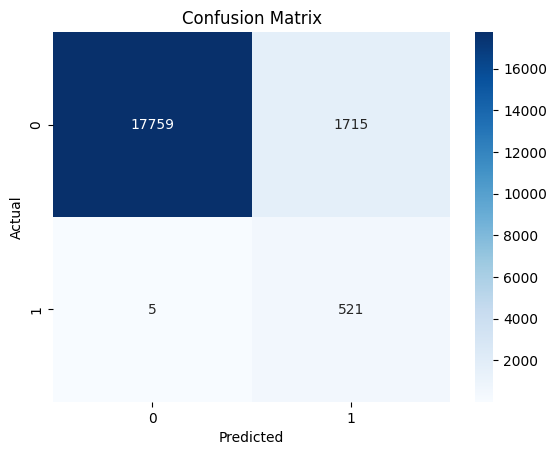

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print("Printing the classification report with fixed parameters...")
print(classification_report(y_test, y_pred1))
IF_report = classification_report(y_test, y_pred1, output_dict=True)
print("Printing the confusion matrix with fixed parameters...")
plot_confusion_matrix(y_test, y_pred1)

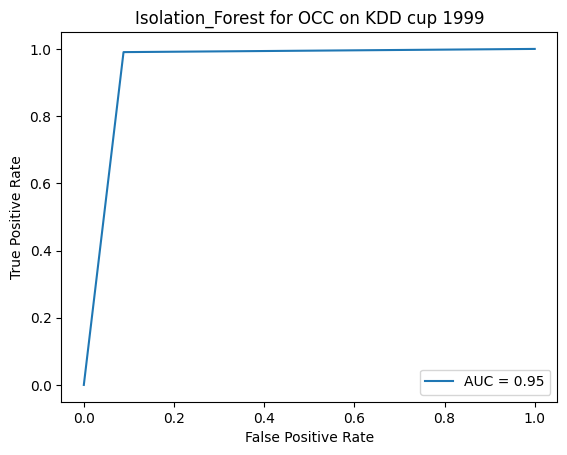

In [33]:
roc_auc_dtl = draw_roc_auc("Isolation_Forest", y_test, y_pred1)
roc_auc_list.append(roc_auc_dtl)

In [34]:
from sklearn.metrics import roc_auc_score

auc1 = roc_auc_score(y_test, y_pred1)
auc2 = roc_auc_score(y_test, y_pred2)
print("AUC score (discrete prediction): ", auc1 * 100)
print("AUC score (continuous prediction):", auc2 * 100)

AUC score (discrete prediction):  95.1214078554969
AUC score (continuous prediction): 5.303112544326429


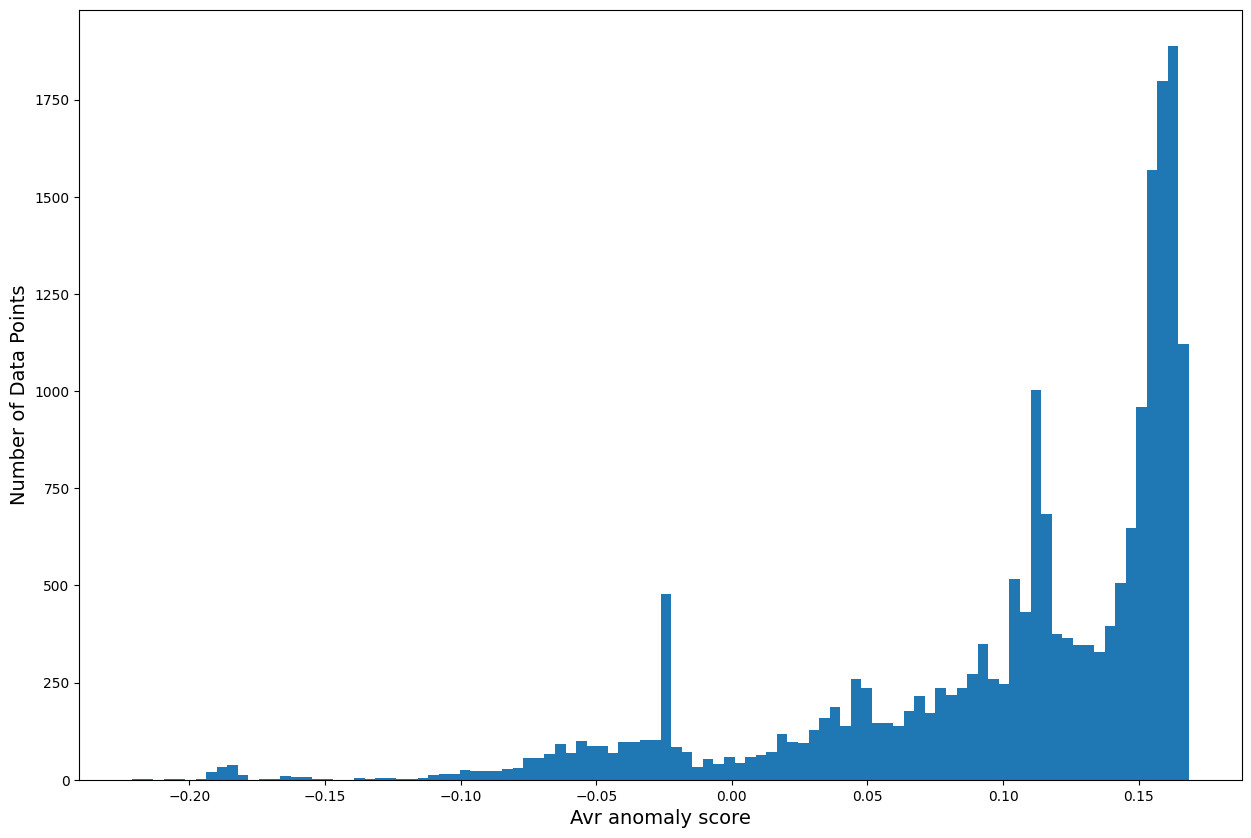

In [35]:
plt.figure(figsize = (15, 10))

plt.hist(y_pred2, bins=100)

plt.xlabel('Avr anomaly score', fontsize=14)

plt.ylabel('Number of Data Points', fontsize=14)

plt.show()

## Kmeans

In [36]:
df = dataframe.copy()

In [37]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [38]:
# Separate the dataset into normal and anomaly
df_normal = df[df['Class'] == 0]
df_anomaly = df[df['Class'] == 1]

In [39]:
print(df_normal.shape)
print(df_anomaly.shape)

(97278, 40)
(396743, 40)


In [40]:
# Balance the dataset: large number of normal rows, fewer anomaly rows
df_anomaly_undersampled = df_anomaly.sample(frac=0.1, random_state=42)
df_balanced = pd.concat([df_normal, df_anomaly_undersampled], axis=0).sample(frac=1, random_state=42)

In [41]:
print("Number of normal data: ", len(df_balanced[df_balanced['Class']==0]))
print("Number of anomaly data: ", len(df_balanced[df_balanced['Class']==1]))

Number of normal data:  97278
Number of anomaly data:  39674


In [42]:
# Separate features and target variable
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

In [43]:
# Convert Categorical features
categorical_columns = ["protocol_type", "service", "flag"]
label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

In [44]:
# Assuming X is your original DataFrame
# Scale the data with StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back into a DataFrame with the original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [45]:
# Apply PCA for dimensionality reduction
pca = PCA()  # Retain 90% of the variance
X_pca = pca.fit_transform(X_scaled_df)

In [46]:
# Calculate Cumulative Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

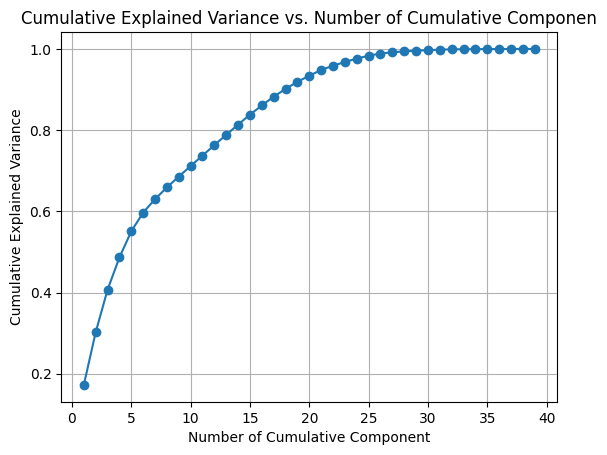

In [47]:
# Plot of the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Cumulative Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Cumulative Componen')
plt.grid(True)

In [48]:
# Set the threshold value for the cumulative explained variance
threshold = 0.90
n_components = np.argmax(cumulative_variance >= threshold) + 1

In [49]:
# Output of the optimum number of primary components
print(f"Optimum number of main components: {n_components}")
# Implementation of the Principal Component Analysis (PCA)
pca = PCA(n_components=n_components)  # Select the number of desired primary components
X_pca = pca.fit_transform(X_scaled_df)

Optimum number of main components: 18


In [50]:
# Retrieve the weights of the original features in the primary components
feature_weights = pca.components_

# Scaling the weights
scaled_weights = feature_weights.T * np.sqrt(pca.explained_variance_)

In [51]:
# Identify the relevant features for each primary component
relevant_features = []
index_selected_features = []
for i, weights in enumerate(scaled_weights):
    component_features = []
    for j, weight in enumerate(weights):
        if abs(weight) > 0.4:  # Set threshold value for determining relevance
            component_features.append(j)  # Add index of the feature
    relevant_features.append(component_features)

In [52]:
# Output of the relevant features for each main component
for i, component_features in enumerate(relevant_features):
    print(f"Primary Compenent {i+1}:")
    for feature_index in component_features:
        print(f"Feature {feature_index+1}")
        index_selected_features.append(feature_index)

Primary Compenent 1:
Feature 5
Primary Compenent 2:
Feature 3
Primary Compenent 3:
Feature 1
Feature 3
Primary Compenent 4:
Feature 1
Feature 2
Primary Compenent 5:
Feature 12
Primary Compenent 6:
Feature 13
Primary Compenent 7:
Feature 14
Primary Compenent 8:
Feature 11
Primary Compenent 9:
Feature 7
Feature 18
Primary Compenent 10:
Feature 6
Primary Compenent 11:
Feature 7
Feature 18
Primary Compenent 12:
Feature 3
Primary Compenent 13:
Feature 4
Primary Compenent 14:
Feature 4
Feature 17
Primary Compenent 15:
Feature 4
Primary Compenent 16:
Feature 4
Primary Compenent 17:
Feature 9
Feature 10
Primary Compenent 18:
Feature 9
Feature 10
Feature 13
Primary Compenent 19:
Feature 4
Feature 17
Primary Compenent 20:
Feature 6
Primary Compenent 21:
Feature 3
Primary Compenent 22:
Feature 3
Primary Compenent 23:
Feature 1
Primary Compenent 24:
Feature 1
Primary Compenent 25:
Feature 2
Primary Compenent 26:
Feature 2
Primary Compenent 27:
Feature 1
Primary Compenent 28:
Feature 15
Feature 16


In [53]:
# Selectierung anhand der relevanten Features für jede Hauptkomponente
index_selected_features = list(set(index_selected_features))
X_scaled_df = X_scaled_df.iloc[:, index_selected_features]
print(index_selected_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [54]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

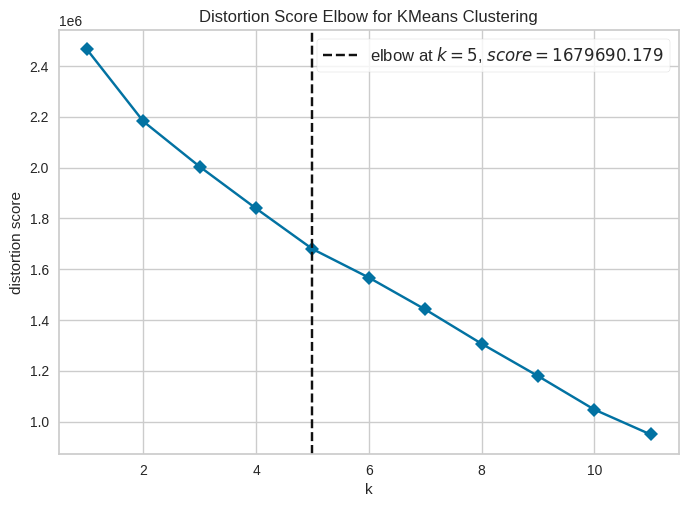

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12),  timings=False)

visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [56]:
# Set the optimal number of clusters (based on the ElbowVisualizer output)
# optimal_clusters = visualizer.elbow_value_
optimal_clusters = 5

In [57]:
if optimal_clusters is None:
    print("No optimal number of clusters found.")
    optimal_clusters = 5
else:
    print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 5


In [58]:
# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [59]:
# Predict clusters
clusters = kmeans.predict(X_scaled_df)

In [60]:
# Map clusters to labels by finding the majority label in each cluster
cluster_labels = {}
for cluster in range(optimal_clusters):
    mask = clusters == cluster
    majority_label = y[mask].mode()[0]  # Get the majority label
    cluster_labels[cluster] = majority_label

In [61]:
# Identify the cluster with the highest number of anomaly '1' classes
anomaly_cluster = max(cluster_labels, key=cluster_labels.get)

In [62]:
# Generate predictions based on the identified cluster
y_pred = np.array([1 if cluster == anomaly_cluster else 0 for cluster in clusters])

<Figure size 1200x800 with 0 Axes>

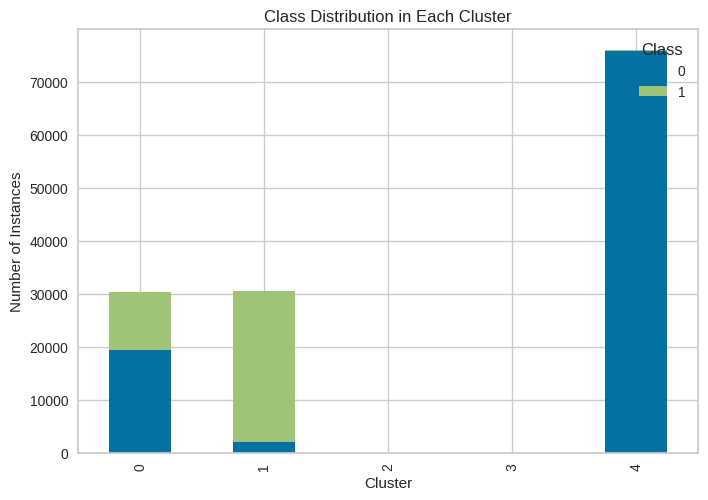

In [63]:
# Create a DataFrame for cluster and class labels
cluster_class_df = pd.DataFrame({'Cluster': clusters, 'Class': y})

# Plot class distribution in each cluster
plt.figure(figsize=(12, 8))
cluster_class_dist = cluster_class_df.groupby(['Cluster', 'Class']).size().unstack(fill_value=0)
cluster_class_dist.plot(kind='bar', stacked=True)
plt.title('Class Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Instances')
plt.legend(title='Class', loc='upper right')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     97278
           1       0.93      0.72      0.81     39674

    accuracy                           0.90    136952
   macro avg       0.91      0.85      0.87    136952
weighted avg       0.90      0.90      0.90    136952



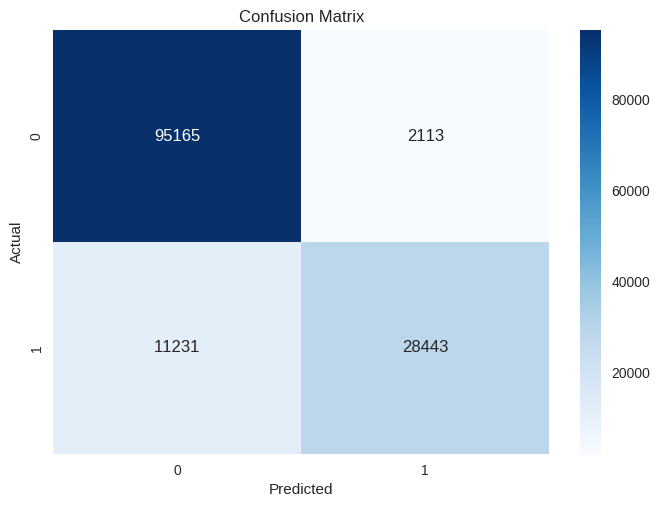

In [64]:
# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
plot_confusion_matrix(y, y_pred)

KM_report = classification_report(y, y_pred, output_dict=True)

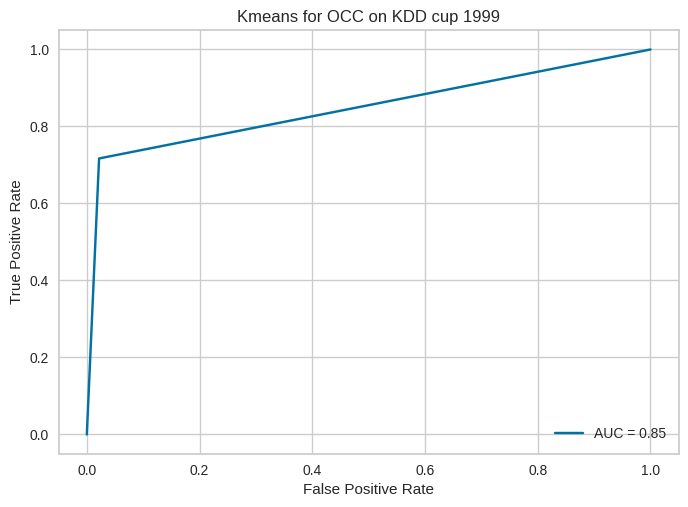

In [65]:
roc_auc_dtl = draw_roc_auc("Kmeans", y, y_pred)
roc_auc_list.append(roc_auc_dtl)

## PCA

In [66]:
df = dataframe.copy()

In [67]:
# Separate the dataset into normal and anomaly
df_normal = df[df['Class'] == 0]
df_anomaly = df[df['Class'] == 1]

In [68]:
# Balance the dataset: large number of normal rows, fewer anomaly rows
df_anomaly_undersampled = df_anomaly.sample(frac=0.1, random_state=42)
df_balanced = pd.concat([df_normal, df_anomaly_undersampled], axis=0).sample(frac=1, random_state=42)

In [69]:
# Separate features and target variable
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

In [70]:
# Convert Categorical features
categorical_columns = ["protocol_type", "service", "flag"]
label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

In [71]:
# Scale the data with StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.90)  # Retain 90% of the variance
X_pca = pca.fit_transform(X_scaled)

In [73]:
# Calculate Cumulative Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

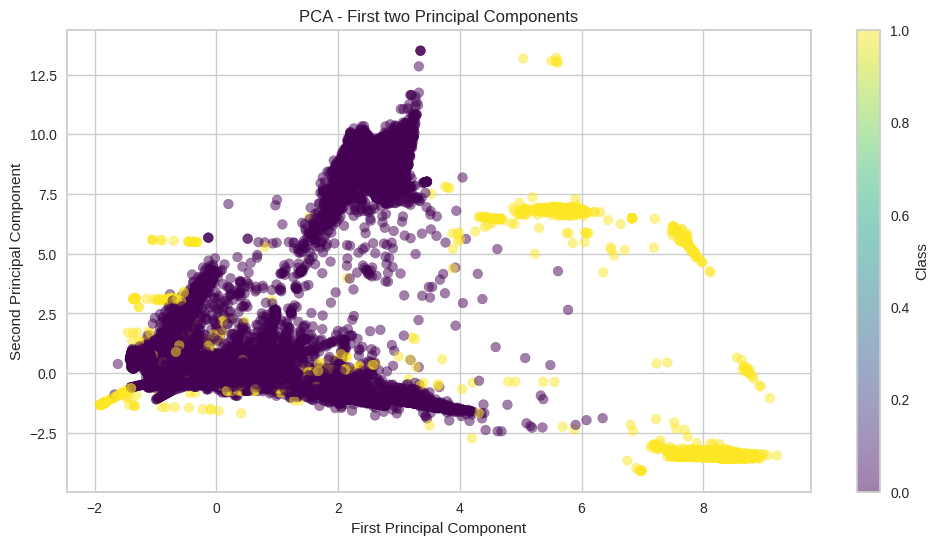

In [74]:
# Plot the first two principal components
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.colorbar(label='Class')
plt.title('PCA - First two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

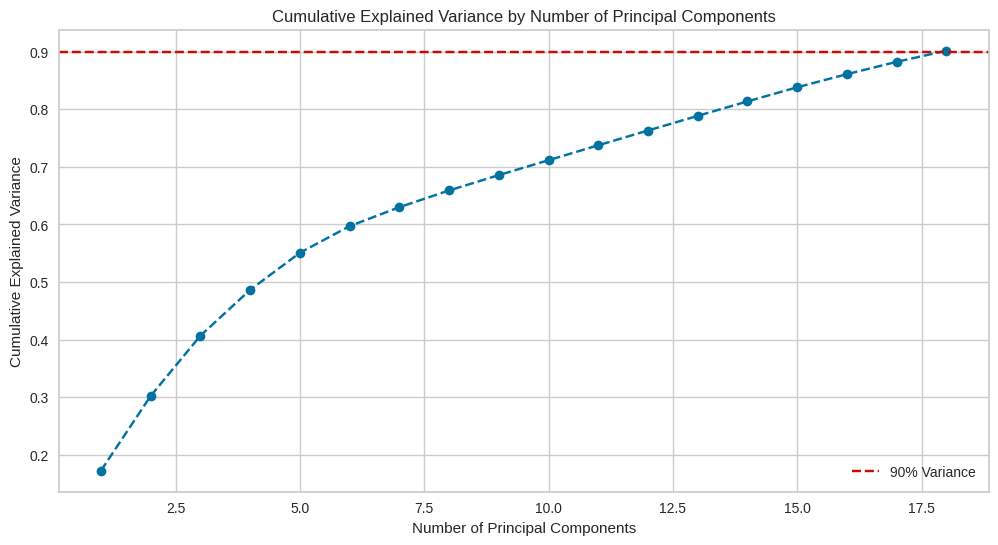

In [75]:
# Plot the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# Reconstruct the original data from the principal components
X_reconstructed = pca.inverse_transform(X_pca)

In [77]:
# Calculate the reconstruction error for each data point
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2, axis=1)
reconstruction_error

array([0.00634604, 0.01757573, 0.00393309, ..., 0.00383116, 0.0005807 ,
       0.00149669])

In [78]:
# Determine a threshold for identifying anomalies
# For example we selected 95th percentile of the reconstruction errors
threshold = np.percentile(reconstruction_error, 95)

In [79]:
# Identify anomalies based on the reconstruction error
y_pred = (reconstruction_error > threshold).astype(int)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.94      0.80     97278
           1       0.08      0.01      0.02     39674

    accuracy                           0.67    136952
   macro avg       0.39      0.47      0.41    136952
weighted avg       0.52      0.67      0.58    136952



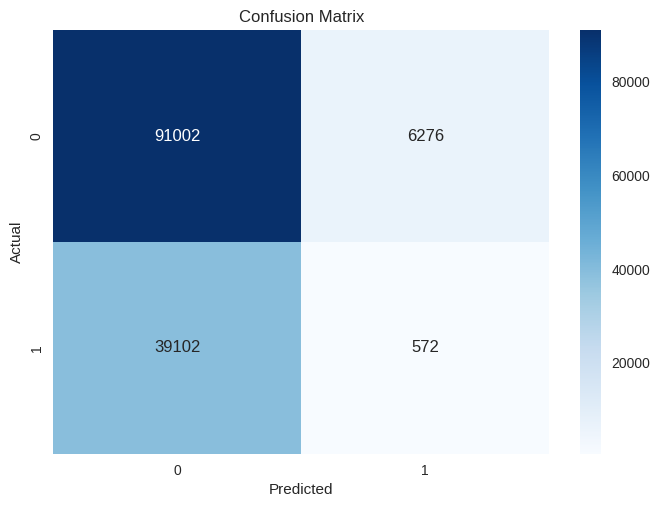

In [80]:
# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
PCA_report = classification_report(y, y_pred, output_dict=True)
plot_confusion_matrix(y, y_pred)

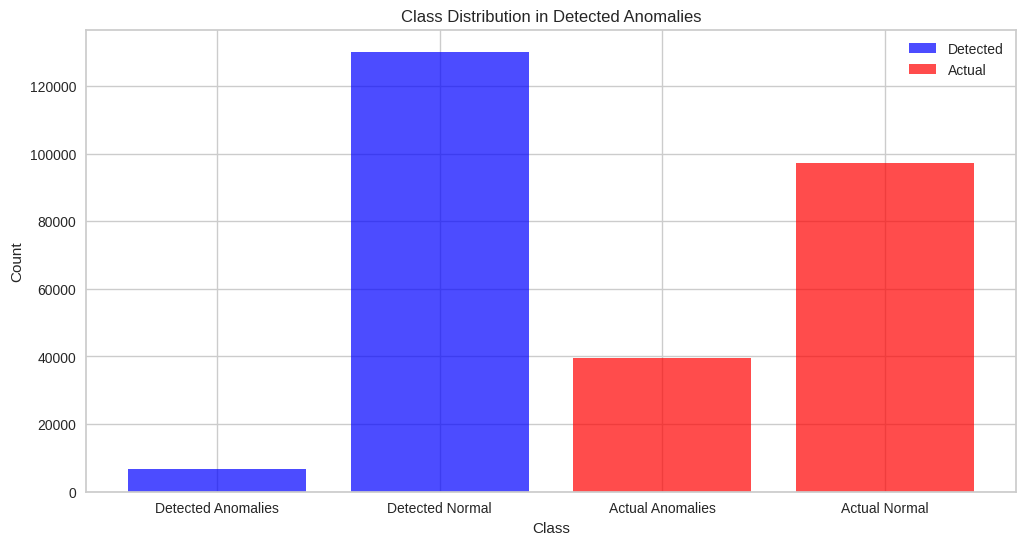

In [81]:
# Bar chart of class distribution in detected anomalies
anomalies = y_pred == 1
normal = y_pred == 0
anomalies_count = np.sum(anomalies)
normal_count = np.sum(normal)
actual_anomalies_count = np.sum(y == 1)
actual_normal_count = np.sum(y == 0)

plt.figure(figsize=(12, 6))
plt.bar(['Detected Anomalies', 'Detected Normal'], [anomalies_count, normal_count], color='blue', alpha=0.7, label='Detected')
plt.bar(['Actual Anomalies', 'Actual Normal'], [actual_anomalies_count, actual_normal_count], color='red', alpha=0.7, label='Actual')
plt.title('Class Distribution in Detected Anomalies')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()
plt.show()

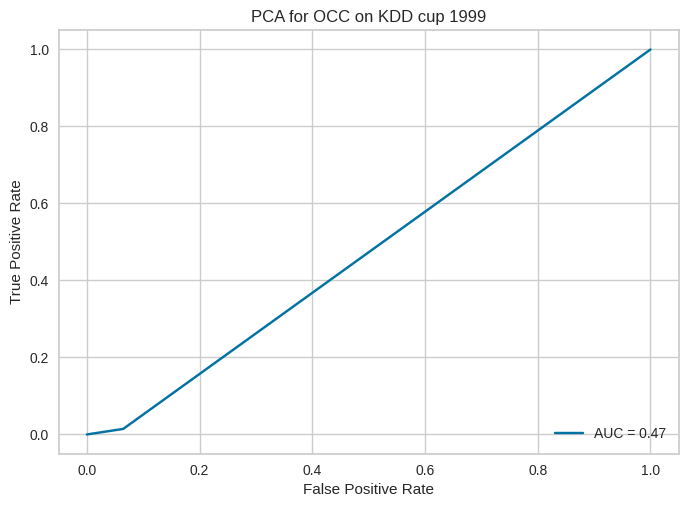

In [82]:
roc_auc_dtl = draw_roc_auc("PCA", y, y_pred)
roc_auc_list.append(roc_auc_dtl)

## DBSCAN

Getting Really Bad results because the attacks would probably have similiar character. Hence will together form a cluster.

In [83]:
df = dataframe.copy()
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [84]:
# TODO: Use the function call
# take all the normal data and some of the abnormal data so the total data points are 1,000,000
df_normal = df[df['Class'] == 0]
df_abnormal = df[df['Class'] != 0]
for i in range(0,10):
    df_abnormal = df_abnormal.iloc[np.random.permutation(len(df_abnormal))]
    df_normal = df_normal.iloc[np.random.permutation(len(df_normal))]
df_abnormal = df_abnormal.sample(100000 - df_normal.shape[0])

In [85]:
# combine the normal and abnormal data
df = pd.concat([df_normal, df_abnormal])

In [86]:
print(df.shape)
print(df['Class'].value_counts())

(100000, 40)
Class
0    97278
1     2722
Name: count, dtype: int64


In [87]:
df_encoded = fun_label_encode(df, ['protocol_type', 'service', 'flag'])
df_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
14975,0,1,17,8,244,9229,0,0,0,0,...,255,1.00,0.0,0.14,0.05,0.0,0.0,0.0,0.0,0
28733,0,1,17,8,248,516,0,0,0,0,...,255,1.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0
85841,0,1,17,8,281,2408,0,0,0,0,...,255,1.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0
88817,0,1,17,8,199,1045,0,0,0,0,...,255,1.00,0.0,0.08,0.01,0.0,0.0,0.0,0.0,0
454171,1195,2,29,8,146,105,0,0,0,0,...,3,0.01,0.7,0.97,0.00,0.0,0.0,0.0,0.0,0


In [88]:
## separate the Fraud and the Normal dataset for future reference
Fraud = df_encoded[df_encoded['Class'] == 1]
Normal = df_encoded[df_encoded['Class'] == 0]

print(Fraud.shape, Normal.shape)

(2722, 40) (97278, 40)


In [89]:
# Take a sample of data
db_data_sample = df_encoded.sample(frac=0.3, random_state=1)
# data_sample = data

db_data_sample.shape

(30000, 40)

In [90]:
# Now we do the rest operation with this sample data to reduce processing
Fraud = db_data_sample[db_data_sample['Class']==1]
Valid = db_data_sample[db_data_sample['Class']==0]

# Find the ration of Outlier to Normal
outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)
print(len(Fraud))
print(len(Valid))

0.027291716604458446
797
29203


In [91]:
# Create independent and dependent features

# create a list of column names
columns = db_data_sample.columns.to_list()

# Filter the columns to remove data we do not want
# columns = [c for c in columns if c not in ['Class','V15','V17','V24','V27','Time']]

# Define a random state
# state = np.random.RandomState(42)

db_X = db_data_sample[columns]
db_Y = db_data_sample['Class']

# print(state)
print(db_X.columns)
print(db_X.shape)
print(db_Y.shape)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'Class'],
      dtype='object')
(30000, 40)
(30000,)


In [92]:
##### here we are going to use min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit(db_X)
dbX_scaled = data_scaled.transform(db_X)

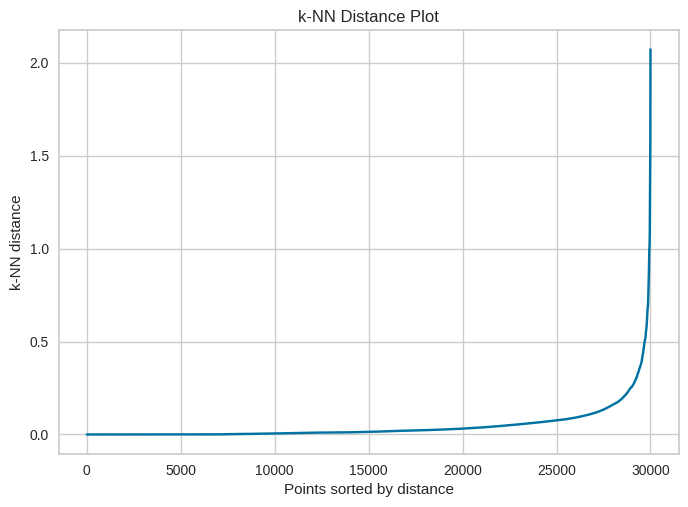

In [93]:
from sklearn.neighbors import NearestNeighbors


# Step 1: Calculate the k-nearest neighbors
k = 5  # k is usually set to min_samples - 1
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(dbX_scaled)
distances, indices = neighbors.kneighbors(dbX_scaled)

# Step 2: Sort the distances (4th column)
distances = np.sort(distances[:, k-1], axis=0)

# Step 3: Plot the distances
plt.plot(distances)
plt.ylabel('k-NN distance')
plt.xlabel('Points sorted by distance')
plt.title('k-NN Distance Plot')
plt.show()

# The "elbow" point is a good candidate for `eps`

In [94]:
from sklearn.cluster import DBSCAN

# Create DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=600)

In [95]:
# Fitting the model
model = dbscan.fit(dbX_scaled)

In [96]:
# classification result as labels
labels = model.labels_

In [97]:
# Find unique values
unique_values = np.unique(labels)

# Print unique values
print(unique_values)

[-1  0  1  2  3  4]


In [98]:
# Consider all nodes belonging to -1 as outliers
outlier_indices = np.where(labels == -1)[0]
print(len(outlier_indices))

5136


In [99]:
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
prediction = np.where(labels == -1, 1, 0)

In [100]:
# Find count of values in db_Y
count_classes = pd.value_counts(db_Y, sort=True)
count_classes

Class
0    29203
1      797
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     29203
           1       0.16      1.00      0.27       797

    accuracy                           0.86     30000
   macro avg       0.58      0.93      0.59     30000
weighted avg       0.98      0.86      0.90     30000



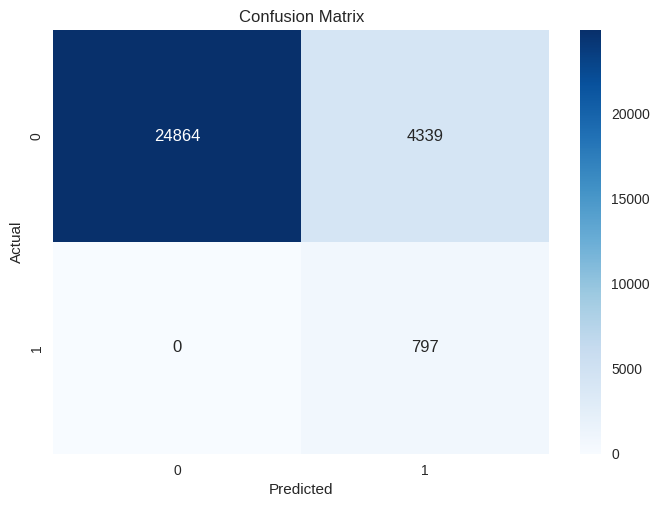

In [101]:
class_names = [0, 1]

### classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(db_Y, prediction))
plot_confusion_matrix(db_Y, prediction)

DBSCAN_report = classification_report(db_Y, prediction, output_dict=True)

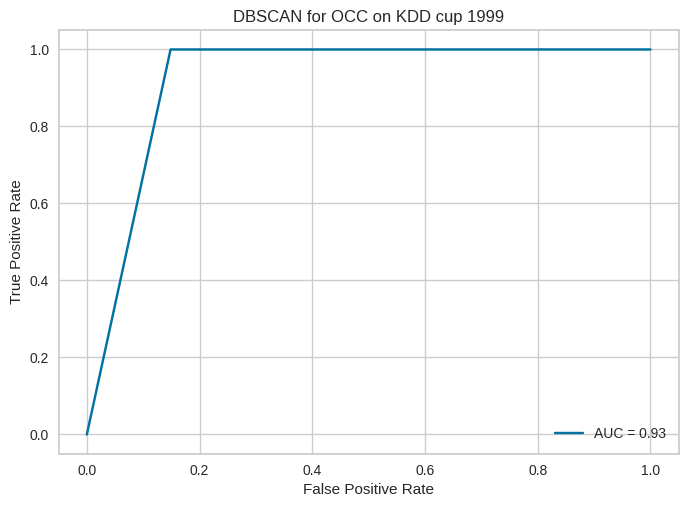

In [102]:
roc_auc_dtl = draw_roc_auc("DBSCAN", db_Y, prediction)
roc_auc_list.append(roc_auc_dtl)

## Auto-Encoder

Here we do not need to generate the unbalanced dataset by down sampling the fraud/attack data

In [103]:
print("Distribuition of Normal(0) and Frauds(1): ")
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes

Distribuition of Normal(0) and Frauds(1): 


Class
0    97278
1     2722
Name: count, dtype: int64

Text(0, 0.5, 'Fraquency')

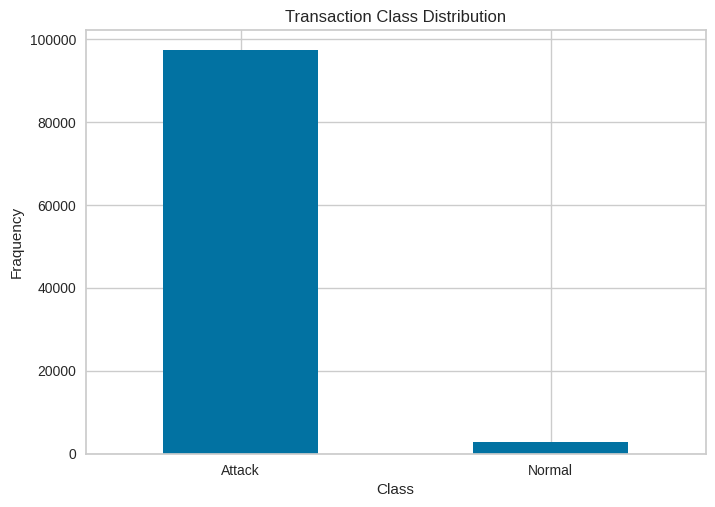

In [104]:
LABELS = ["Attack", "Normal"]

count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
# Set labels on x-axis
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Fraquency")

In [105]:
df = dataframe.copy()
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [106]:
# Selecting the first 18 columns Since in PCA we have found out that the first 18 column can define 90% of the variance
# first_18_columns = df.columns[:18]

# Adding the 'Class' column to the list of selected columns
# selected_columns = list(first_18_columns) + ['Class']

# Creating a new DataFrame with only the selected columns
# df_after_selected = df[selected_columns]

# Same method another way
# df_selected = df.iloc[:, :18]
# df_selected['Class'] = df['Class']

df_selected = df

In [107]:
df_selected.shape

(494021, 40)

In [108]:
# Convert categorical data into numerical
df_encoded = fun_label_encode(df_selected, ['protocol_type', 'service', 'flag'])
print(df_encoded.shape)
df_encoded.head()

(494021, 40)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [109]:
df_training, df_testing = train_test_split(df_encoded,test_size = 0.2, random_state = 42,stratify = df_encoded.Class)

In [110]:
train_data,validation_data,train_label, validation_label = train_test_split(df_training.loc[:,df_training.columns != 'Class'],df_training.Class,test_size = 0.2, stratify  = df_training.Class, random_state = 42)

In [111]:
##### here we are going to use min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)
train_data_normalised = data_scaled.transform(train_data)
validation_data_normalised = data_scaled.transform(validation_data)

test_data = df_testing.loc[:, df_testing.columns != 'Class']
test_label = df_testing.Class
test_data_normalised = data_scaled.transform(test_data)

In [112]:
print(f"train_data_normalised.shape: {train_data_normalised.shape}")
print(f"validation_data_normalised.shape: {validation_data_normalised.shape}")
print(f"test_data_normalised.shape: {test_data_normalised.shape}")

train_data_normalised.shape: (316172, 39)
validation_data_normalised.shape: (79044, 39)
test_data_normalised.shape: (98805, 39)


In [113]:
# lets change the labels with boolean
train_label,validation_label, test_label = train_label.astype(bool), validation_label.astype(bool), test_label.astype(bool)

In [114]:
# now  lets seperate the normal and fraud data out of training dataset
normal_train_data = train_data_normalised[~train_label] # normal transactions out of train_data_normalised
normal_test_data = test_data_normalised[~test_label] # normal transactions out of test_data_normalised
normal_validation_data = validation_data_normalised[~validation_label]

In [115]:
print(len(normal_train_data))
print(len(normal_test_data))
print(len(normal_validation_data))

62257
19456
15565


In [116]:
fraud_train_data = train_data_normalised[train_label]
fraud_test_data = test_data_normalised[test_label]
fraud_validation_data = validation_data_normalised[validation_label]

In [117]:
print(len(fraud_train_data))
print(len(fraud_test_data))
print(len(fraud_validation_data))

253915
79349
63479


Normal Data

In [118]:
plot_dim = int(normal_train_data[0].shape[0])
print(plot_dim)

39


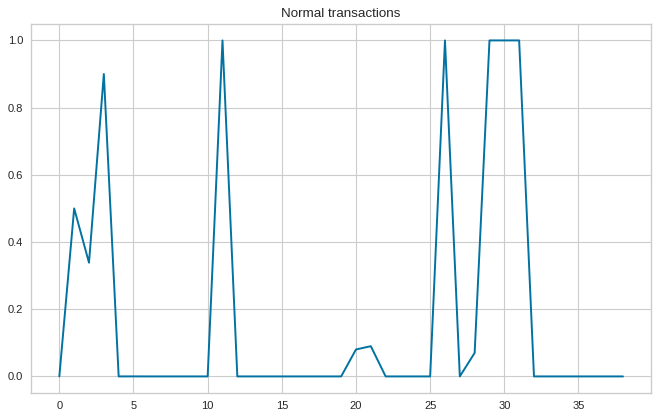

In [119]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
plt.plot(np.arange(plot_dim), normal_train_data[1])
plt.title('Normal transactions')

plt.show()

Fraud Data

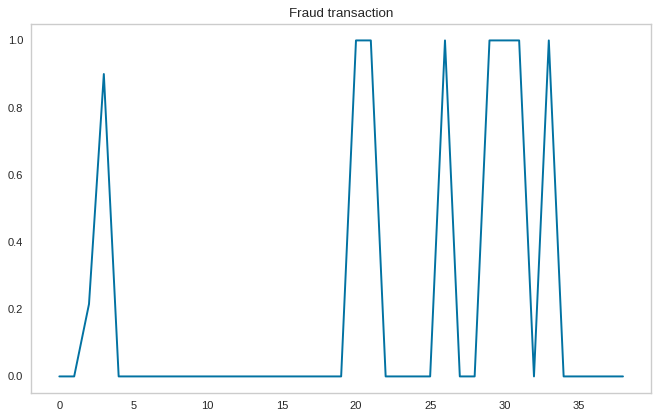

In [120]:
#Lets plot one from fraud transaction
figure(figsize=(10, 6), dpi=80)

plt.plot(np.arange(plot_dim), fraud_train_data[2])
plt.grid()
plt.title('Fraud transaction')
plt.show()

Encoder Design

In [121]:
from tensorflow.keras import models,layers,activations,losses,optimizers,metrics
from tensorflow.keras.callbacks import EarlyStopping

In [122]:
n_features = len(train_data.columns)
encoder = models.Sequential(name='encoder')
encoder.add(layer=layers.Dense(units=200, activation=activations.relu, input_shape=[n_features]))
encoder.add(layers.Dropout(0.1))
encoder.add(layer=layers.Dense(units=100, activation=activations.relu))
encoder.add(layer=layers.Dense(units=5, activation=activations.relu))

Decoder Design

In [123]:
decoder = models.Sequential(name='decoder')
decoder.add(layer=layers.Dense(units=100, activation=activations.relu, input_shape=[5]))
decoder.add(layer=layers.Dense(units=200, activation=activations.relu))
decoder.add(layers.Dropout(0.1))
decoder.add(layer=layers.Dense(units=n_features, activation=activations.sigmoid))

In [124]:
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(loss=losses.MSE, optimizer=optimizers.Adam(), metrics=[metrics.mean_squared_error])

In [125]:
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=5,restore_best_weights=True)
history = autoencoder.fit(x=normal_train_data, y=normal_train_data, epochs=100, verbose=1, validation_data=(normal_validation_data, normal_validation_data), callbacks=[es])

Epoch 1/100
1946/1946 [==============================] - 9s 4ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 9.4085e-04 - val_mean_squared_error: 9.4085e-04
Epoch 2/100
1946/1946 [==============================] - 7s 3ms/step - loss: 9.6260e-04 - mean_squared_error: 9.6260e-04 - val_loss: 6.5914e-04 - val_mean_squared_error: 6.5914e-04
Epoch 3/100
1946/1946 [==============================] - 7s 3ms/step - loss: 7.5115e-04 - mean_squared_error: 7.5115e-04 - val_loss: 5.5414e-04 - val_mean_squared_error: 5.5414e-04
Epoch 4/100
1946/1946 [==============================] - 7s 3ms/step - loss: 6.4029e-04 - mean_squared_error: 6.4029e-04 - val_loss: 4.8864e-04 - val_mean_squared_error: 4.8864e-04
Epoch 5/100
1946/1946 [==============================] - 7s 4ms/step - loss: 5.6603e-04 - mean_squared_error: 5.6603e-04 - val_loss: 4.3136e-04 - val_mean_squared_error: 4.3136e-04
Epoch 6/100
1946/1946 [==============================] - 7s 3ms/step - loss: 5.3097e-04 - mean_squared_

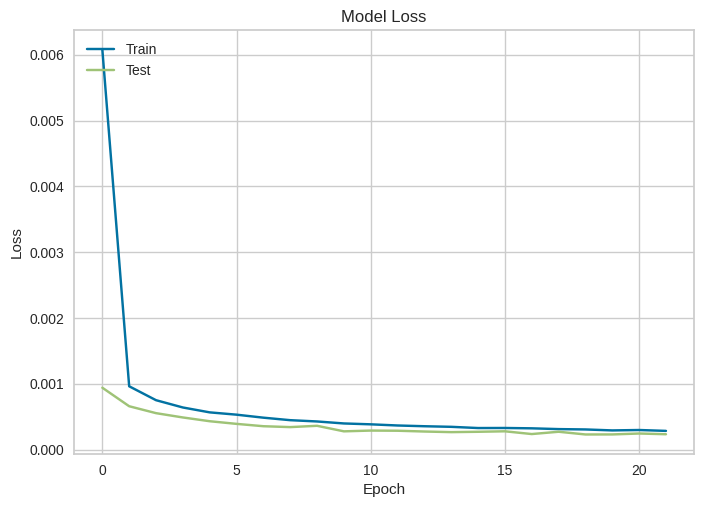

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [127]:
# Define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  dec_img = autoencoder.predict(data) # this will decode or reconstruct
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(plot_dim), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

608/608 [==============================] - 1s 2ms/step


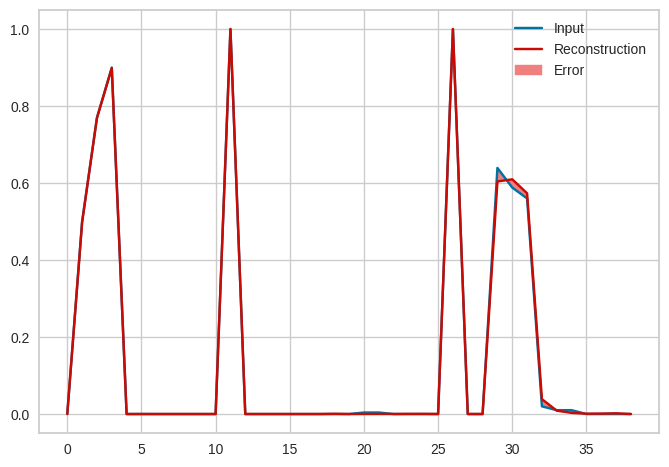

2480/2480 [==============================] - 4s 2ms/step


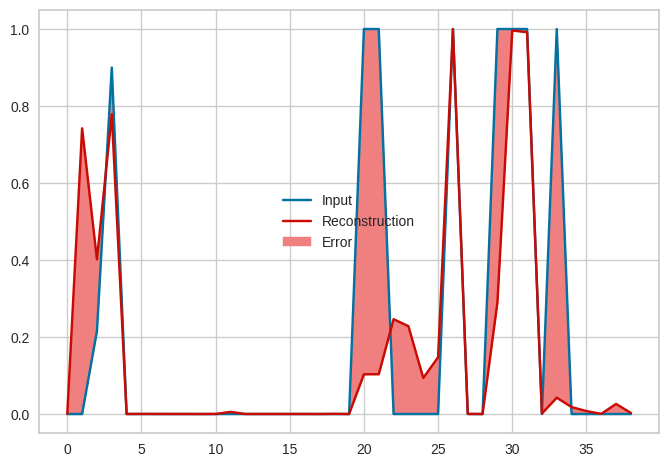

In [128]:
plot(normal_test_data, 4) # here n shows the index of ecg samples
plot(fraud_test_data, 4)

Finding a threshold to detect Anomaly

1946/1946 [==============================] - 3s 2ms/step
0.003044277184297935


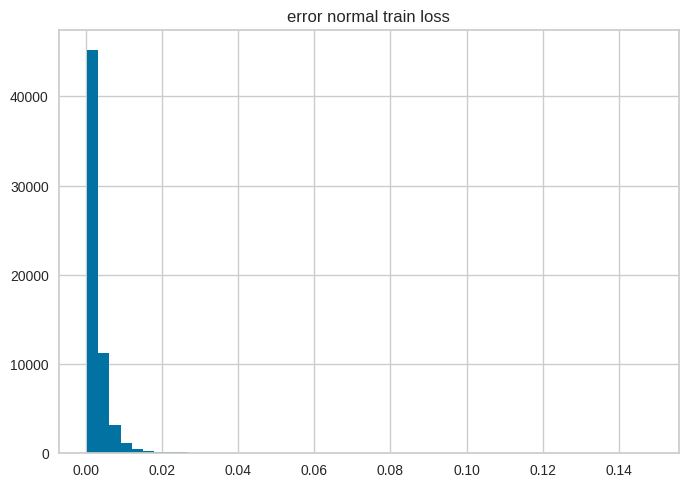

In [129]:
### calculating the train error  in legit transactions
reconstructed = autoencoder.predict(normal_train_data)
train_normal_loss = losses.mae(reconstructed, normal_train_data).numpy()
print(np.mean(train_normal_loss))

plt.hist(train_normal_loss, bins = 50)
plt.title('error normal train loss')
plt.show()

7935/7935 [==============================] - 13s 2ms/step
0.14500924743780316


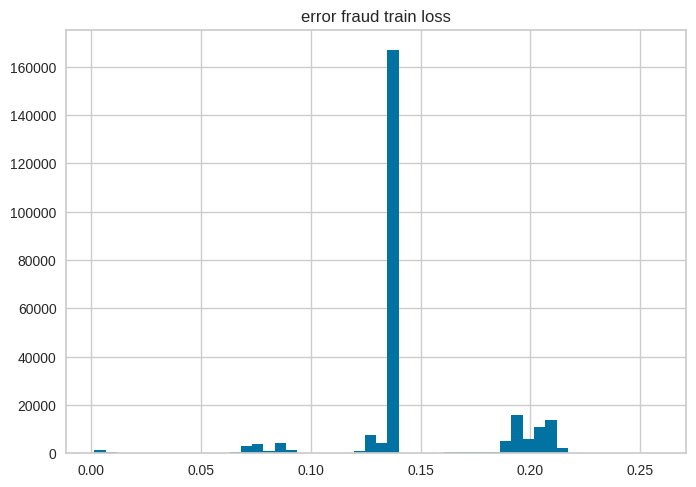

In [130]:
### calculating the train error  in fraud transactions
reconstructed = autoencoder.predict(fraud_train_data)
train_fraud_loss = losses.mae(reconstructed, fraud_train_data).numpy()
print(np.mean(train_fraud_loss))
plt.hist(train_fraud_loss, bins = 50)
plt.title('error fraud train loss')
plt.show()

In [131]:
Fraud = df.Class.sum()
total = len(df)
fraud_percentage = (Fraud/total)*100
fraud_percentage
# so lets say that 1% of transactions are fraud so lets find the threshold

80.30893423558918

In [132]:
# calcualting the error in the whole train data
reconstructed = autoencoder.predict(train_data_normalised)
train_loss = losses.mae(reconstructed, train_data_normalised).numpy()

9881/9881 [==============================] - 16s 2ms/step


In [133]:
# we are assuming that we have 80% of fraud transaction here
cut_off_1 = np.percentile(train_loss, 20)
cut_off_1

0.015330624938997886

In [134]:
cut_off_2 = np.mean(train_loss) + 5*np.std(train_loss)
cut_off_2
# 2std division covers 97% of the distribution and here i have taken 3 std division

0.4397134909242545

if error is greater than this value we would say fraud transaction if lesser than cut-off means legitimate transaction

Prediction on our TEST data

In [135]:
reconstructed = autoencoder.predict(test_data_normalised)
errors = losses.mae(reconstructed,test_data_normalised)
len(errors)
predicted = []
for error in errors:
    if error > cut_off_1:
        predicted.append(1)
    else:
        predicted.append(0)

3088/3088 [==============================] - 5s 2ms/step


In [136]:
np.sort(errors)[::-1]

array([0.25801301, 0.25790345, 0.25785933, ..., 0.00043098, 0.00041154,
       0.0004098 ])

In [137]:
predicted_fraud_cases = np.array(predicted).sum()
actual_fraud_cases = test_label.sum()
print('predicted_fruad_cases =>'.format(), predicted_fraud_cases, 'true fraud cases =>'.format(), actual_fraud_cases)

predicted_fruad_cases => 79122 true fraud cases => 79349


In [138]:
# From booliean Map back to 1 and 0
true_label = test_label.map({True:1,False:0})

Conclusion

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     19456
           1       1.00      0.99      0.99     79349

    accuracy                           0.99     98805
   macro avg       0.98      0.99      0.99     98805
weighted avg       0.99      0.99      0.99     98805



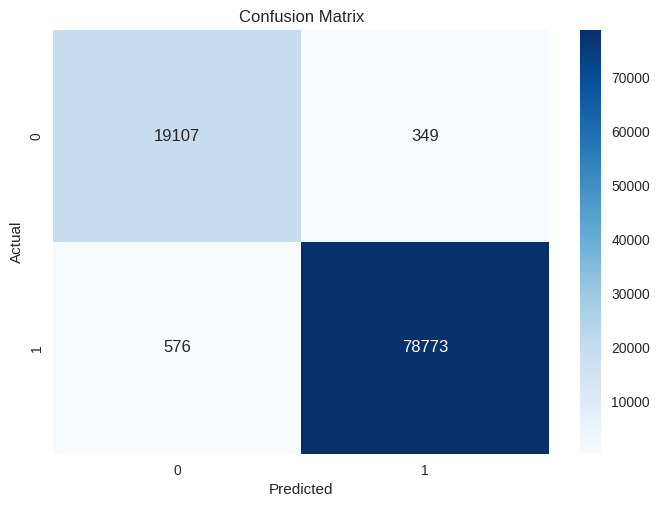

In [139]:
### classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(true_label, predicted))
plot_confusion_matrix(true_label, predicted)

Autoencoder_report = classification_report(true_label, predicted, output_dict=True)

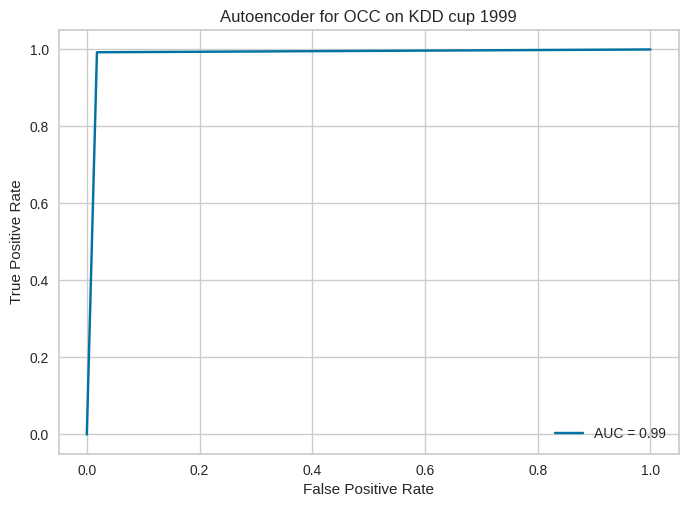

In [140]:
roc_auc_dtl = draw_roc_auc("Autoencoder", true_label, predicted)
roc_auc_list.append(roc_auc_dtl)

4/4 [==============================] - 0s 2ms/step


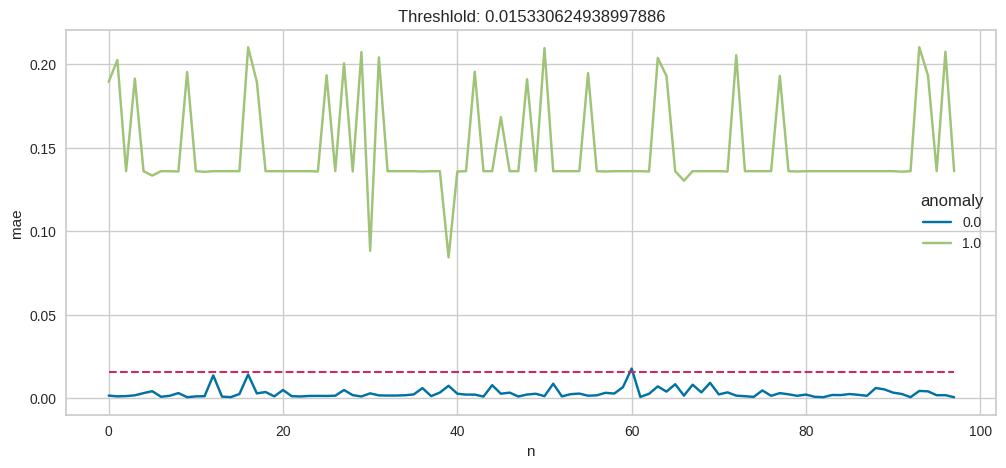

In [141]:
from matplotlib import lines
plot_samples = 98
plt.figure(figsize=(12,5))

# normal event
n_features = plot_dim
real_x = normal_test_data[:plot_samples]
predicted_x = autoencoder.predict(x=real_x)
normal_events_mae = losses.mae(real_x, predicted_x)
normal_events_df = pd.DataFrame({
	'mae': normal_events_mae,
	'n': np.arange(0, plot_samples),
	'anomaly': np.zeros(plot_samples)})


# abnormal event
abnormal_x = fraud_test_data[:plot_samples]
predicted_x = autoencoder.predict(x=abnormal_x)
abnormal_events_mae = losses.mae(abnormal_x, predicted_x)
abnormal_events_df = pd.DataFrame({
	'mae': abnormal_events_mae,
	'n': np.arange(0, plot_samples),
	'anomaly': np.ones(plot_samples)})
abnormal_events_df

mae_df = pd.concat([normal_events_df, abnormal_events_df])
plot = sns.lineplot(x=mae_df.n, y=mae_df.mae, hue=mae_df.anomaly)

line = lines.Line2D(
	xdata=np.arange(0, plot_samples),
	ydata=np.full(plot_samples, cut_off_1),
	color='#CC2B5E',
	linewidth=1.5,
	linestyle='dashed')

plot.add_artist(line)
plt.title('Threshlold: {threshold}'.format(threshold=cut_off_1))
plt.show()

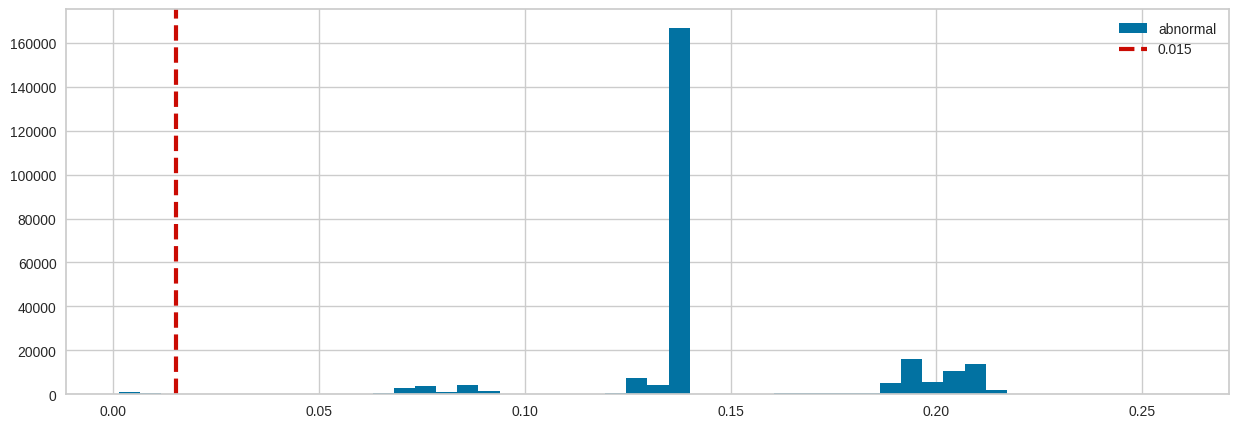

In [142]:
plt.figure(figsize=(15,5))

# plt.hist(train_normal_loss, bins = 50, label = 'normal')
plt.hist(train_fraud_loss, bins = 50, label = 'abnormal')
plt.axvline(cut_off_1, color = 'r', linewidth = 3, linestyle = 'dashed', label = '{:0.3f}'.format(cut_off_1))
plt.legend(loc = 'upper right')
plt.show()

## GMM

In [143]:
df = dataframe.copy()

In [144]:
# Split the data into normal and abnormal
gmm_df_normal = df[df['Class'] == 0]
gmm_df_abnormal = df[df['Class'] != 0]

# Sample 63,000 rows from the normal data
gmm_sampled_normal = gmm_df_normal.sample(n=65000, random_state=42)

# Sample 7,000 rows from the abnormal data
gmm_sampled_abnormal = gmm_df_abnormal.sample(n=5000, random_state=42)

# Concatenate the sampled normal and abnormal data
gmm_sampled_df = pd.concat([gmm_sampled_normal, gmm_sampled_abnormal])

# Shuffle the dataset to mix normal and abnormal data points
gmm_sampled_df = gmm_sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the shape and the distribution of classes
print(gmm_sampled_df.shape)
print(gmm_sampled_df['Class'].value_counts())

(70000, 40)
Class
0    65000
1     5000
Name: count, dtype: int64


In [145]:
gmm_sampled_df['Class'].value_counts()

Class
0    65000
1     5000
Name: count, dtype: int64

In [146]:
# Count fraudulent transactions (Class = 1)
num_fraudulent = gmm_sampled_df['Class'].value_counts().get(1, 0)

# Count normal transactions (Class = 0)
num_normal = gmm_sampled_df['Class'].value_counts().get(0, 0)

# Calculate the ratio
if num_normal > 0:
    ratio = num_fraudulent / num_normal
else:
    ratio = float('inf')  # Avoid division by zero if there are no normal transactions

print(f'Number of fraudulent transactions: {num_fraudulent}')
print(f'Number of normal transactions: {num_normal}')
print(f'Ratio of fraudulent to normal transactions: {ratio: f}')

Number of fraudulent transactions: 5000
Number of normal transactions: 65000
Ratio of fraudulent to normal transactions:  0.076923


In [147]:
gy = gmm_sampled_df['Class']
gX = gmm_sampled_df.drop(['Class'], axis=1)

In [148]:
# Encoding Categorical data
gX_encoded = fun_label_encode(gX, ['protocol_type', 'service', 'flag'])

gX_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,7,221,1718,0,0,0,0,...,110,255,1.00,0.00,0.01,0.04,0.00,0.00,0.0,0.0
1,0,2,10,7,36,0,0,0,0,0,...,255,37,0.15,0.08,0.15,0.00,0.01,0.00,0.0,0.0
2,0,1,19,0,0,0,0,0,0,0,...,28,96,1.00,0.00,0.04,0.19,0.00,0.00,1.0,1.0
3,0,1,19,7,295,1227,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.0,0.0
4,0,1,19,7,376,2710,0,0,0,0,...,112,219,1.00,0.00,0.01,0.06,0.00,0.00,0.0,0.0


In [149]:
# Standardize features
scaler = StandardScaler()
gX_scaled = scaler.fit_transform(gX_encoded)

In [150]:
from sklearn.mixture import GaussianMixture

In [151]:
# Define the range for n_components
n_components_range = range(1, 11)

# Lists to store the BIC and AIC scores
bic_scores = []
aic_scores = []

# Fit GMM for each n_components and calculate BIC and AIC
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, n_init=5, random_state=42)
    gmm.fit(gX_scaled)
    bic_scores.append(gmm.bic(gX_scaled))
    aic_scores.append(gmm.aic(gX_scaled))

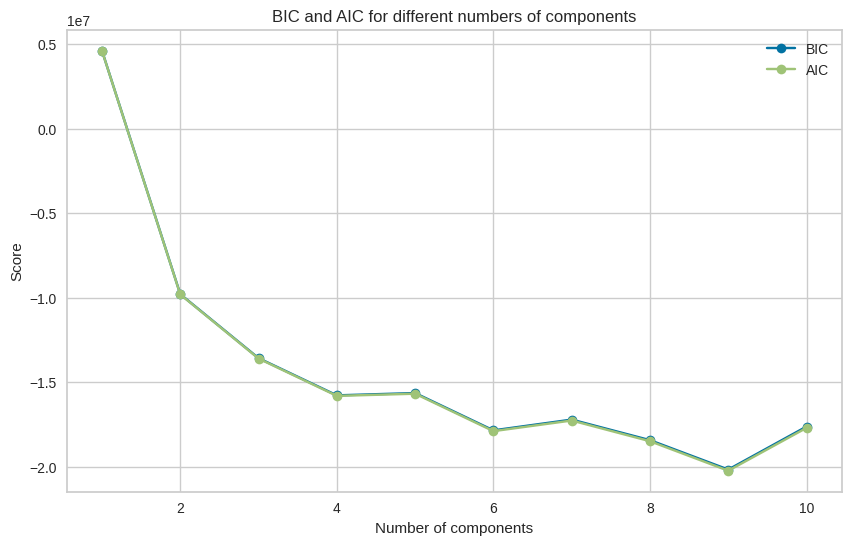

In [152]:
# Plot BIC and AIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.title('BIC and AIC for different numbers of components')
plt.legend()
plt.show()

In [153]:
# Fit GMM model
gmm = GaussianMixture(n_components=9, n_init=5, random_state=42)
y_gmm = gmm.fit(gX_scaled)

In [154]:
# Compute scores
score = gmm.score_samples(gX_scaled)
gmm_sampled_df['score'] = score
gmm_sampled_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class,score
0,0,tcp,http,SF,221,1718,0,0,0,0,...,1.00,0.00,0.01,0.04,0.00,0.00,0.0,0.0,0,176.609806
1,0,udp,domain_u,SF,36,0,0,0,0,0,...,0.15,0.08,0.15,0.00,0.01,0.00,0.0,0.0,0,98.859292
2,0,tcp,http,REJ,0,0,0,0,0,0,...,1.00,0.00,0.04,0.19,0.00,0.00,1.0,1.0,0,137.177704
3,0,tcp,http,SF,295,1227,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.0,0.0,0,163.201138
4,0,tcp,http,SF,376,2710,0,0,0,0,...,1.00,0.00,0.01,0.06,0.00,0.00,0.0,0.0,0,172.208031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,tcp,http,SF,291,1719,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0,176.865394
69996,0,tcp,http,SF,203,516,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0,175.750770
69997,0,tcp,http,SF,215,2168,0,0,0,0,...,1.00,0.00,0.01,0.01,0.00,0.00,0.0,0.0,0,177.132130
69998,0,udp,private,SF,105,147,0,0,0,0,...,0.87,0.01,0.01,0.00,0.00,0.00,0.0,0.0,0,161.454467


In [155]:
# Determine threshold for anomalies
threshold = np.percentile(score, 7)
print(f'The threshold of the score is {threshold:.2f}')

The threshold of the score is 87.23


In [156]:
# Assign anomaly labels based on the threshold
gmm_sampled_df['predicted_class'] = (gmm_sampled_df['score'] < threshold).astype(int)

In [157]:
len(gmm_sampled_df[gmm_sampled_df['predicted_class']==1])

4900

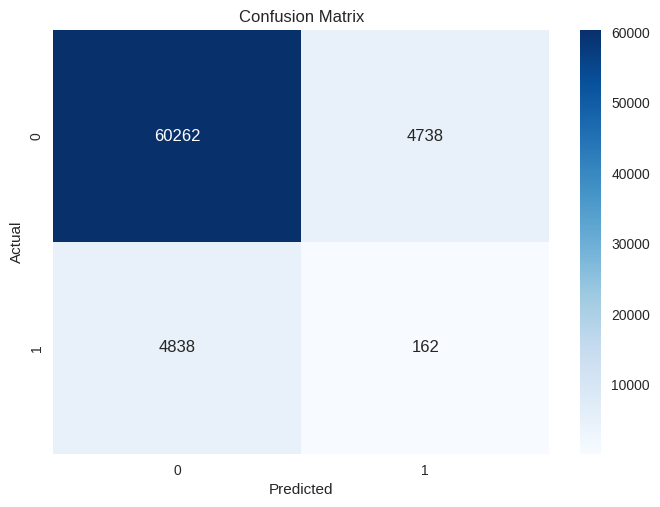

In [158]:
plot_confusion_matrix(gy, gmm_sampled_df['predicted_class'])

In [159]:
# Generate classification report
class_report = classification_report(gy, gmm_sampled_df['predicted_class'])
print('Classification Report:')
print(class_report)

gmm_report = classification_report(gy, gmm_sampled_df['predicted_class'], output_dict=True)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     65000
           1       0.03      0.03      0.03      5000

    accuracy                           0.86     70000
   macro avg       0.48      0.48      0.48     70000
weighted avg       0.86      0.86      0.86     70000



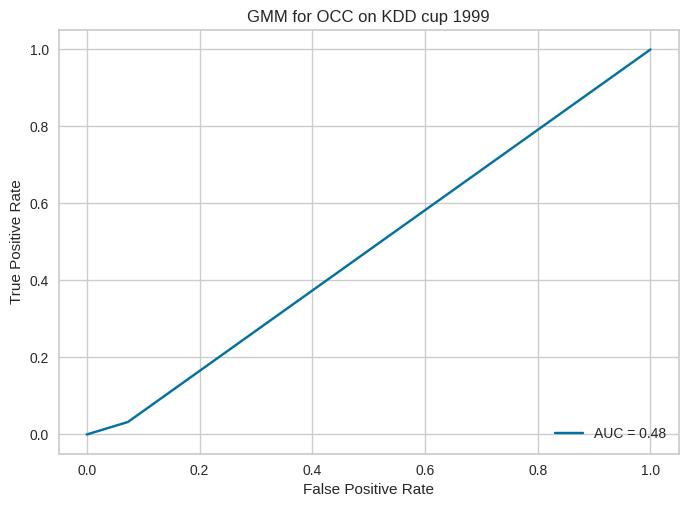

In [160]:
roc_auc_dtl = draw_roc_auc("GMM", gy, gmm_sampled_df['predicted_class'])
roc_auc_list.append(roc_auc_dtl)

## Histogram Based

In [161]:
hbos_df = dataframe.copy()
hbos_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [162]:
# Separate majority and minority classes
hbos_df_majority = hbos_df[hbos_df['Class'] == 1]
hbos_df_minority = hbos_df[hbos_df['Class'] == 0]

In [163]:
hbos_df_sampled = downsample_anomaly(hbos_df)

In [164]:
# Calculate contamination value
num_attacks = len(hbos_df_sampled[hbos_df_sampled['Class']==1])
num_normals = len(hbos_df_sampled[hbos_df_sampled['Class']==0])
total_instances = len(hbos_df_sampled)
contamination_value = num_attacks / total_instances


print(f"Contamination Value: {contamination_value}")

Contamination Value: 0.10713990693063855


In [165]:
hbos_df_sampled.shape

(108951, 40)

In [166]:
print(hbos_df_sampled['Class'].value_counts())
hbos_df_sampled.head()

Class
0    97278
1    11673
Name: count, dtype: int64


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [167]:
# Separate features and target
hbos_X = hbos_df_sampled.drop('Class', axis=1)
hbos_y = hbos_df_sampled['Class']

In [168]:
hbosX_encoded = fun_label_encode(hbos_X, ['protocol_type', 'service', 'flag'])
hbosX_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,21,9,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,21,9,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,21,9,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,21,9,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,21,9,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [169]:
# Standardize the features
scaler = StandardScaler()
hbosX_scaled = scaler.fit_transform(hbosX_encoded)
hbosX_scaled

array([[-0.15010367, -0.17381341, -0.3836521 , ..., -0.16059006,
        -0.25534746, -0.25373621],
       [-0.15010367, -0.17381341, -0.3836521 , ..., -0.16059006,
        -0.25534746, -0.25373621],
       [-0.15010367, -0.17381341, -0.3836521 , ..., -0.16059006,
        -0.25534746, -0.25373621],
       ...,
       [-0.15010367, -0.17381341,  1.52501986, ...,  6.42645668,
        -0.25534746, -0.25373621],
       [-0.15010367, -2.14704926, -1.01987608, ..., -0.16059006,
        -0.25534746, -0.25373621],
       [-0.15010367, -2.14704926, -1.01987608, ..., -0.16059006,
        -0.25534746, -0.25373621]])

In [170]:
from pyod.models.hbos import HBOS

# Initialize HBOS
hbos = HBOS(contamination=contamination_value, n_bins=20)

# Fit HBOS to the data
hbos.fit(hbosX_scaled)

HBOS(alpha=0.1, contamination=0.10713990693063855, n_bins=20, tol=0.5)

In [171]:
# Predict the outliers
hbos_y_pred = hbos.labels_  # binary labels (0: inliers, 1: outliers)
hbos_y_scores = hbos.decision_scores_  # raw outlier scores

In [172]:
len(hbos_y_pred)

108951

In [173]:
# Get the unique values and their counts
values, counts = np.unique(hbos_y_pred, return_counts=True)

# Print the count of each value
for value, count in zip(values, counts):
    print(f"Value {value} appears {count} times")

Value 0 appears 97306 times
Value 1 appears 11645 times


In [174]:
hbos_y_scores

array([-5.98522785, -7.77316352, -6.78472467, ..., 35.75846133,
        4.46853655,  0.28828629])

In [175]:
print("\nClassification Report:")
print(classification_report(hbos_y, hbos_y_pred))

hbos_report = classification_report(hbos_y, hbos_y_pred, output_dict=True)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     97278
           1       0.28      0.28      0.28     11673

    accuracy                           0.85    108951
   macro avg       0.60      0.60      0.60    108951
weighted avg       0.85      0.85      0.85    108951



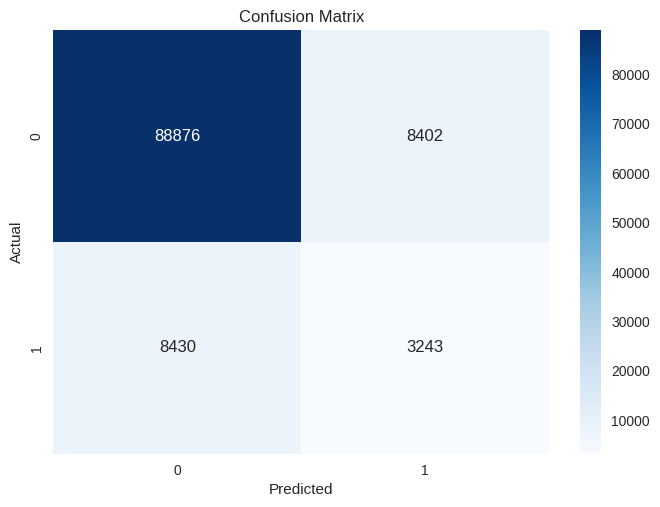

In [176]:
plot_confusion_matrix(hbos_y, hbos_y_pred)

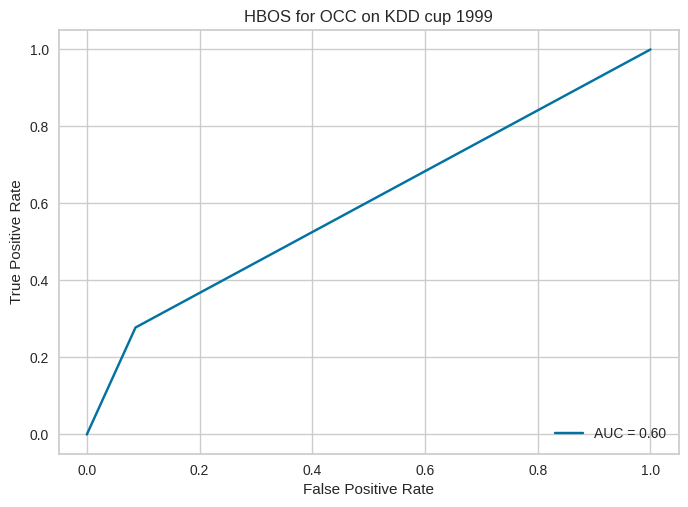

In [177]:
roc_auc_dtl = draw_roc_auc("HBOS", hbos_y, hbos_y_pred)
roc_auc_list.append(roc_auc_dtl)

## LOF

In [178]:
lof_df = dataframe.copy()
lof_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [179]:
# Down Sampling the class for better performance of the algorithm
lof_df_downsampled = downsample_anomaly(lof_df)

In [180]:
count_classes = pd.value_counts(lof_df_downsampled['Class'], sort=True)
count_classes

Class
0    97278
1    11673
Name: count, dtype: int64

Text(0, 0.5, 'Fraquency')

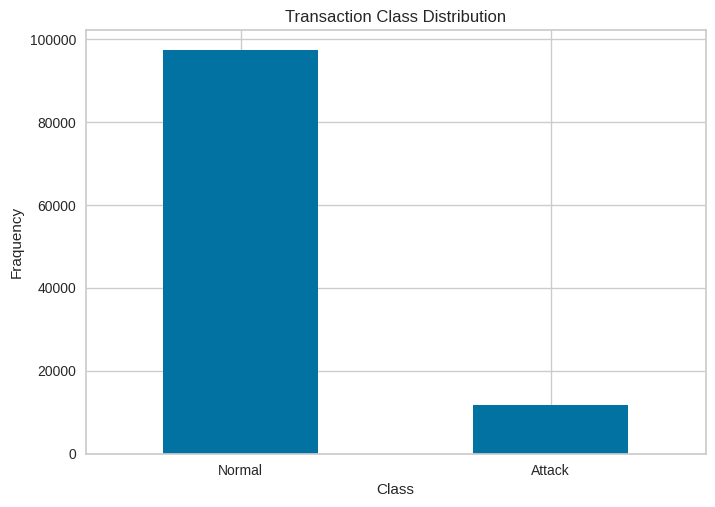

In [181]:
count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
# Set labels on x-axis
plt.xticks(range(2), ['Normal', 'Attack'])
plt.xlabel("Class")
plt.ylabel("Fraquency")

In [182]:
## separate the Fraud and the Normal dataset for future reference
lof_Attack = lof_df_downsampled[lof_df_downsampled['Class'] == 1]
lof_Normal = lof_df_downsampled[lof_df_downsampled['Class'] == 0]

print(lof_Attack.shape, lof_Normal.shape)

(11673, 40) (97278, 40)


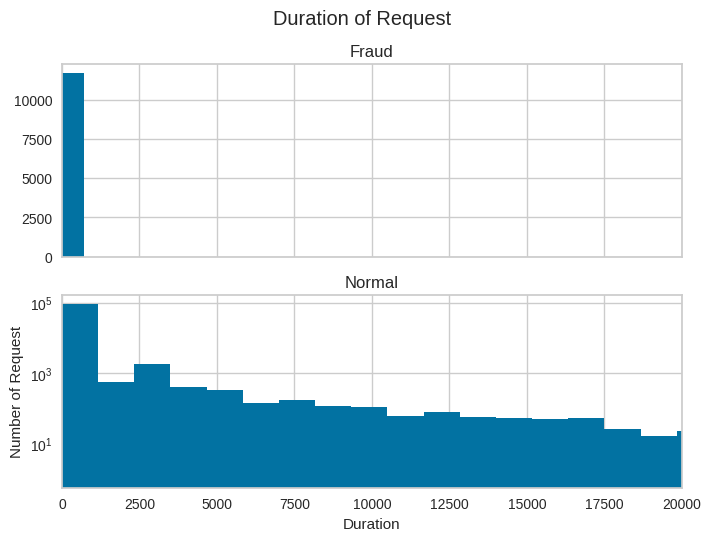

In [183]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Duration of Request')
ax1.hist(lof_Attack.duration, bins=50)
ax1.set_title('Fraud')
ax2.hist(lof_Normal.duration, bins=50)
ax2.set_title('Normal')
plt.xlabel('Duration')
plt.ylabel('Number of Request')
# sets the limit of x-axis unit from 0 to 20000
plt.xlim((0, 20000))
# make the y-axis unit in logarithmic scale
plt.yscale('log')
plt.show()

In [184]:
# Take a sample of data
lof_data_sample = lof_df_downsampled.sample(frac=0.3, random_state=1)
# data_sample = data

print(lof_data_sample.shape)

(32685, 40)


In [185]:
# Now we do the rest operation with this sample data to reduce processing
lof_Attack = lof_data_sample[lof_data_sample['Class']==1]
lof_Normal = lof_data_sample[lof_data_sample['Class']==0]

# Find the ration of Outlier to Normal
outlier_fraction = len(lof_Attack)/float(len(lof_Normal))

print(outlier_fraction)
print(len(lof_Attack))
print(len(lof_Normal))

0.12134623301770275
3537
29148


In [186]:
lof_X = lof_data_sample.drop(['Class'], axis=1)
lof_y = lof_data_sample['Class']

In [187]:
lof_X_encoded = fun_label_encode(lof_X, ['protocol_type', 'service', 'flag'])
lof_X_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
219722,0,0,11,8,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
83874,0,1,17,8,322,2999,0,0,0,0,...,26,255,1.00,0.00,0.04,0.03,0.0,0.0,0.0,0.0
415413,0,0,11,8,520,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
455295,0,1,17,0,0,0,0,0,0,0,...,1,255,1.00,0.00,1.00,0.08,0.0,0.0,1.0,1.0
104499,0,1,29,8,66,3226,0,0,0,0,...,178,6,0.03,0.04,0.01,0.00,0.0,0.0,0.0,0.0


In [188]:
# Standardize the features
scaler = MinMaxScaler()
lof_X_scaled = scaler.fit_transform(lof_X_encoded)
lof_X_scaled

array([[0.00000000e+00, 0.00000000e+00, 2.34042553e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.00000000e-01, 3.61702128e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.34042553e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00, 1.91489362e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20959207e-04, 5.00000000e-01, 7.23404255e-01, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.00000000e-01, 3.61702128e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [189]:
from sklearn.neighbors import LocalOutlierFactor

# Works just like K-nearest neighbor so n_neighbour parameter stands for no. of neighbors we have to search for a datapoint
# contamination parameter influences how aggressively the LOF algorithm identifies outliers
LOF_classifier = LocalOutlierFactor(n_neighbors=600, algorithm='auto', metric='minkowski',
                   p=2, metric_params=None, contamination=0.1)

In [190]:
lof_y_pred = LOF_classifier.fit_predict(lof_X_scaled)
lof_y_pred

array([-1,  1, -1, ...,  1,  1,  1])

In [191]:
# Higher the lower the value(keep in my values are negative) higher the chance of it being outlier
lof_score_prediction = LOF_classifier.negative_outlier_factor_
lof_score_prediction

array([-3.16369342e+07, -1.26308021e+00, -1.04269680e+02, ...,
       -1.19278809e+00, -9.72617350e-01, -2.17090871e+00])

In [192]:
outlier_indices = np.where(lof_y_pred == -1)[0]
print(len(outlier_indices))

3269


In [193]:
# !! CAREFUL RUN ONLY ONCE
lof_y_pred[lof_y_pred == 1] = 0
lof_y_pred[lof_y_pred == -1] = 1

In [194]:
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions

print("Accuracy Score :", accuracy_score(lof_y, lof_y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(lof_y, lof_y_pred))
print("Classification Report :")
print(classification_report(lof_y, lof_y_pred))

lof_report = classification_report(lof_y, lof_y_pred, output_dict=True)

Accuracy Score : 0.853510784763653
Confusion Matrix: 
[[26888  2260]
 [ 2528  1009]]
Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     29148
           1       0.31      0.29      0.30      3537

    accuracy                           0.85     32685
   macro avg       0.61      0.60      0.61     32685
weighted avg       0.85      0.85      0.85     32685



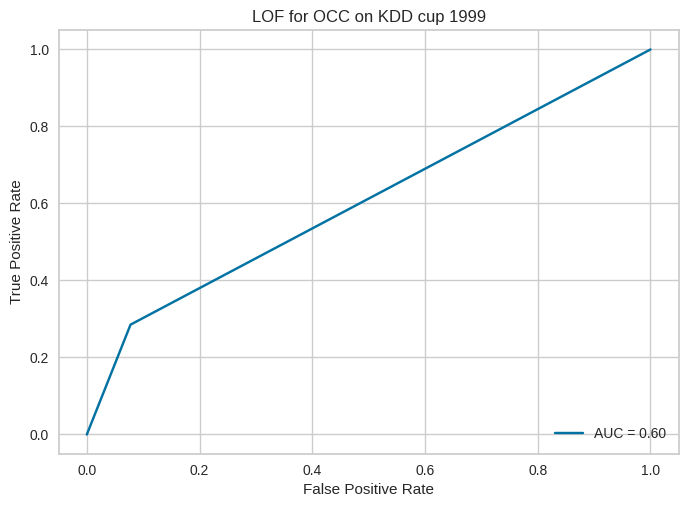

In [195]:
roc_auc_dtl = draw_roc_auc("LOF", lof_y, lof_y_pred)
roc_auc_list.append(roc_auc_dtl)

## One Class SVM

In [196]:
svm1_df = dataframe.copy()
svm1_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


For One-Class SVM to work effectively the anomaly must be made rare

In [197]:
svm1_df_downsampled = downsample_anomaly(svm1_df)
svm1_df_downsampled.Class.value_counts()

Class
0    97278
1    11673
Name: count, dtype: int64

In [198]:
svm1_df_encoded = fun_label_encode(svm1_df_downsampled, ['protocol_type', 'service', 'flag'])

svm1_df_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,1,21,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,21,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,21,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,21,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,21,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


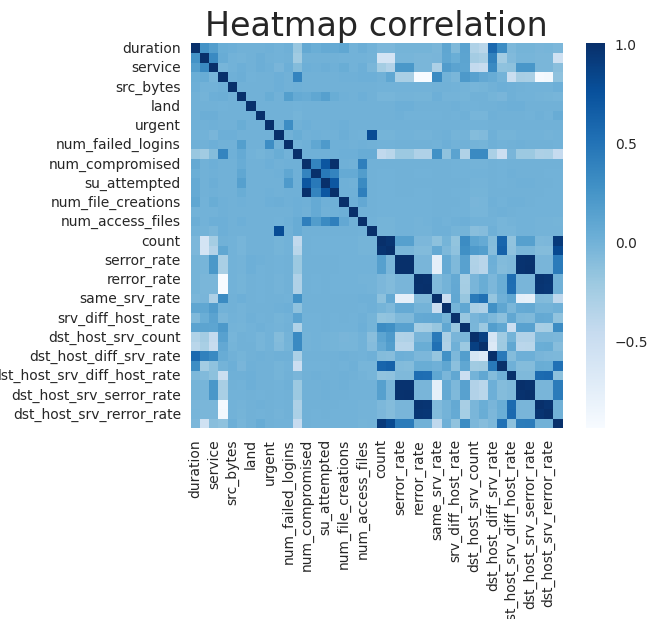

In [199]:
import seaborn

svm1_df_downsampled_corr = svm1_df_encoded.corr()

plt.figure(figsize=(6,5))
seaborn.heatmap(svm1_df_downsampled_corr, cmap='Blues')
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

The above graph shows that there are certain correlation between different attribute so if needed we can apply PCA

In [200]:
# Assuming 'Class' is the label column with 1 for fraud and 0 for normal transactions
svm1_X = svm1_df_encoded.drop(columns=['Class'])
svm1_y = svm1_df_encoded['Class']

In [201]:
svm1_X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,21,9,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,21,9,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,21,9,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,21,9,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,21,9,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [202]:
# Scale the features
scaler = StandardScaler()
svm1_X_scaled = scaler.fit_transform(svm1_X)
svm1_X_scaled

array([[-0.15010367, -0.17381341, -0.3836521 , ..., -0.16059006,
        -0.25534746, -0.25373621],
       [-0.15010367, -0.17381341, -0.3836521 , ..., -0.16059006,
        -0.25534746, -0.25373621],
       [-0.15010367, -0.17381341, -0.3836521 , ..., -0.16059006,
        -0.25534746, -0.25373621],
       ...,
       [-0.15010367, -0.17381341,  1.52501986, ...,  6.42645668,
        -0.25534746, -0.25373621],
       [-0.15010367, -2.14704926, -1.01987608, ..., -0.16059006,
        -0.25534746, -0.25373621],
       [-0.15010367, -2.14704926, -1.01987608, ..., -0.16059006,
        -0.25534746, -0.25373621]])

In [203]:
# Split the data into training and testing sets
svm_X_train, svm_X_test, svm_y_train, svm_y_test = train_test_split(svm1_X_scaled, svm1_y, test_size=0.3, random_state=42)

print(f'There are {svm_X_train.shape[0]} samples in the training set and {svm_X_test.shape[0]} samples in the test set.')

There are 76265 samples in the training set and 32686 samples in the test set.


In [204]:
# Train One-Class SVM on normal transactions only
svm_X_train_normal = svm_X_train[svm_y_train == 0]

In [205]:
from sklearn.svm import OneClassSVM

# Initialise OneClassSVM class
ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='auto')

In [206]:
# Fiting the data
ocsvm.fit(svm_X_train_normal)

OneClassSVM(gamma='auto', nu=0.01)

In [207]:
# Check number of anomaly i  y test
len(svm_y_test[svm_y_test == 1])

3422

In [208]:
# Predict on the test set
svm_y_pred = ocsvm.predict(svm_X_test)

In [209]:
# Map predictions to 0 for normal and 1 for anomaly to match the original labels
svm_y_pred = [1 if x == -1 else 0 for x in svm_y_pred]

In [210]:
anomalies_count = sum(svm_y_pred)
print("Number of anomalies predicted:", anomalies_count)

Number of anomalies predicted: 3690


In [211]:
print("Classification Report: ")
print(classification_report(svm_y_test, svm_y_pred))

svm_report = classification_report(svm_y_test, svm_y_pred, output_dict=True)

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29264
           1       0.92      0.99      0.95      3422

    accuracy                           0.99     32686
   macro avg       0.96      0.99      0.97     32686
weighted avg       0.99      0.99      0.99     32686



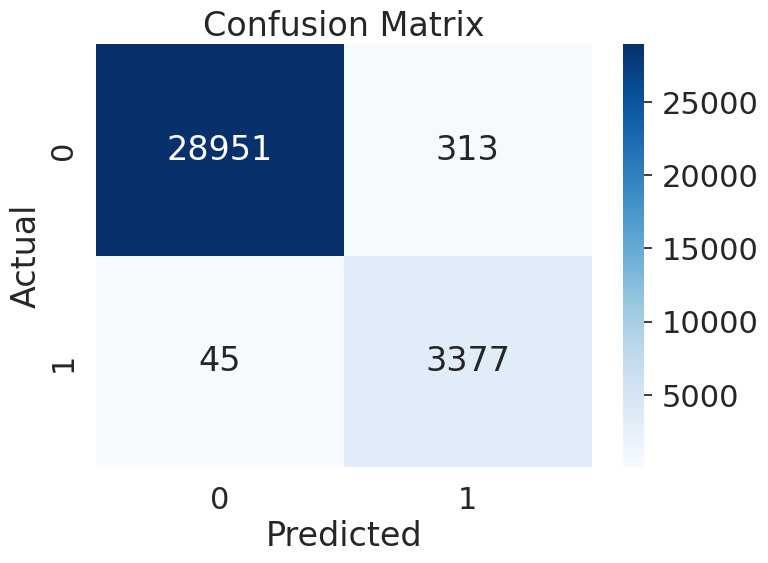

In [212]:
plot_confusion_matrix(svm_y_test, svm_y_pred)

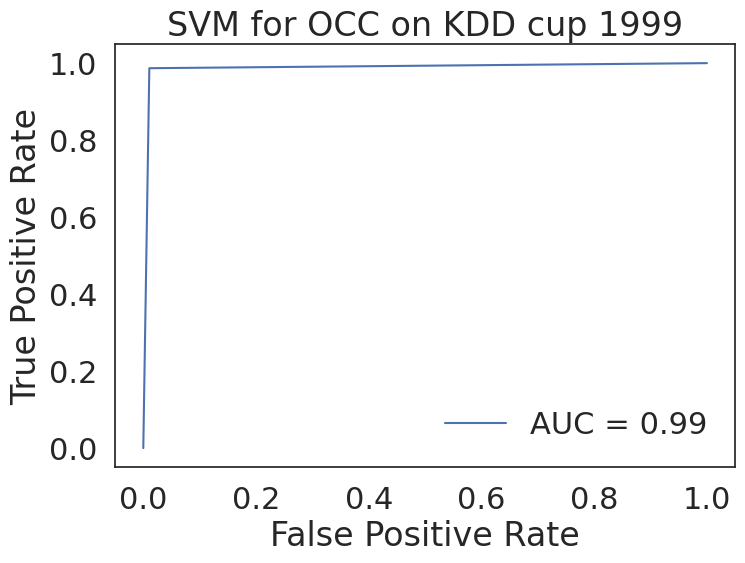

In [213]:
roc_auc_dtl = draw_roc_auc("SVM", svm_y_test, svm_y_pred)
roc_auc_list.append(roc_auc_dtl)

## MCD

In [214]:
mcd_df = dataframe.copy()
mcd_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [215]:
mcd_df_downsampled = downsample_anomaly(mcd_df)
mcd_df_downsampled.Class.value_counts()

Class
0    97278
1    11673
Name: count, dtype: int64

In [216]:
class_counts = mcd_df_downsampled.Class.value_counts()
frequency = class_counts[1] / class_counts[0]
print(frequency)

0.1199962992660211


In [217]:
mcd_df_encoded = fun_label_encode(mcd_df_downsampled, ['protocol_type', 'service', 'flag'])

mcd_df_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,1,21,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,21,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,21,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,21,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,21,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [218]:
# Assuming 'Class' is the label column with 1 for fraud and 0 for normal transactions
mcd_X = mcd_df_encoded.drop(columns=['Class'])
mcd_y = mcd_df_encoded['Class']

In [219]:
# Scale the features
scaler = StandardScaler()
mcd_X_scaled = scaler.fit_transform(mcd_X)

In [220]:
from pyod.models.mcd import MCD

mcd_detector = MCD(contamination=frequency, support_fraction=1, random_state=42)

In [221]:
# Fit the model
mcd_detector.fit(mcd_X_scaled)

MCD(assume_centered=False, contamination=0.1199962992660211, random_state=42,
  store_precision=True, support_fraction=1)

In [222]:
# Get the prediction
mcd_pred = mcd_detector.predict(mcd_X_scaled)
# Get the decision scores
mcd_scores = mcd_detector.decision_scores_

In [223]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_auc_score, f1_score, adjusted_rand_score, mutual_info_score, precision_recall_curve, auc
# Calculate ROC AUC
roc_auc = roc_auc_score(mcd_y, mcd_scores)
f1 = f1_score(mcd_y, mcd_pred)
ari = adjusted_rand_score(mcd_y, mcd_pred)
mi_score = mutual_info_score(mcd_y, mcd_pred)

In [224]:
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Adjusted Rand Index:", ari)
print("Mutual Information Score:", mi_score)

ROC AUC Score: 0.5358919369756024
F1 Score: 0.26686062957126117
Adjusted Rand Index: 0.13713681299528116
Mutual Information Score: 0.011961127830228152


              precision    recall  f1-score   support

           0       0.91      0.90      0.91     97278
           1       0.25      0.28      0.27     11673

    accuracy                           0.83    108951
   macro avg       0.58      0.59      0.59    108951
weighted avg       0.84      0.83      0.84    108951

Recall score: 0.28287501070847254


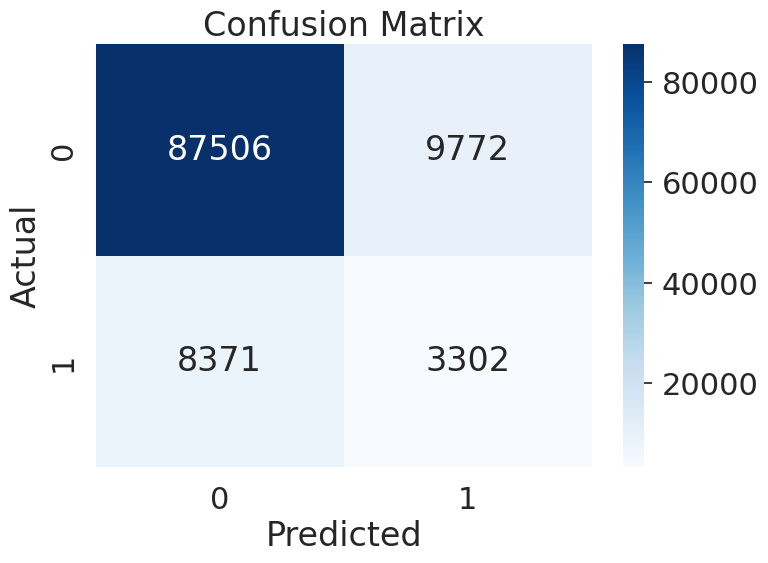

In [225]:
print(classification_report(mcd_y, mcd_pred))
print(f"Recall score: {recall_score(mcd_y, mcd_pred)}")

mcd_report = classification_report(mcd_y, mcd_pred, output_dict=True)

plot_confusion_matrix(mcd_y, mcd_pred)

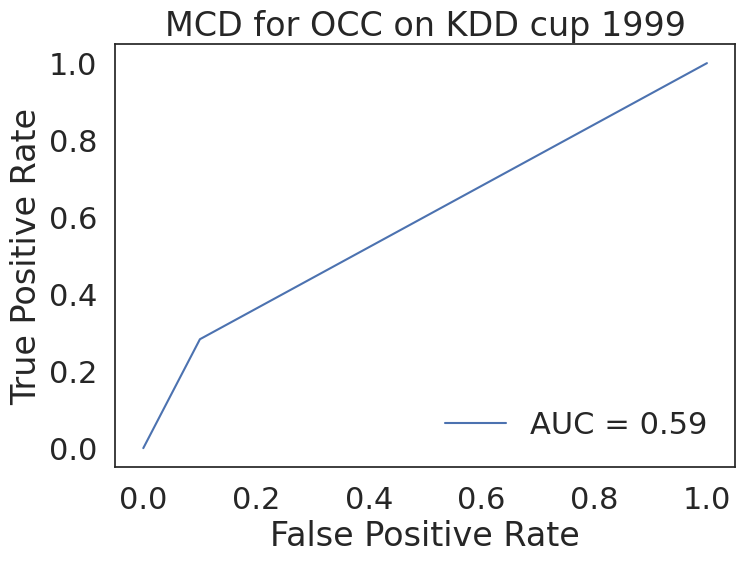

In [226]:
roc_auc_dtl = draw_roc_auc("MCD", mcd_y, mcd_pred)
roc_auc_list.append(roc_auc_dtl)

## CBLOF

Seperate Labels from feature value

In [227]:
df = dataframe.copy()

In [228]:
df_downsampled = downsample_anomaly(df)
df_downsampled.Class.value_counts()

Class
0    97278
1    11673
Name: count, dtype: int64

In [229]:
class_counts = df_downsampled.Class.value_counts()
frequency = class_counts[1] / class_counts[0]

In [230]:
df_encoded = fun_label_encode(df_downsampled, ['protocol_type', 'service', 'flag'])

df_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,1,21,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,21,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,21,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,21,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,21,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [231]:
# Separate features and labels
X = df_encoded.drop(['Class'], axis=1)
y = df_encoded['Class']

Scale the feature values

In [232]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [233]:
from pyod.models.cblof import CBLOF

# Initialize the CBLOF model
cblof = CBLOF(contamination=frequency, random_state=42)

In [234]:
# Fit the model
cblof.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1199962992660211, n_clusters=8, n_jobs=None,
   random_state=42, use_weights=False)

In [235]:
# Get the outlier scores
y_pred = cblof.labels_  # binary labels (0: inliers, 1: outliers)
y_scores = cblof.decision_scores_  # raw outlier scores

In [236]:
len(y_pred[y_pred==1])

13074

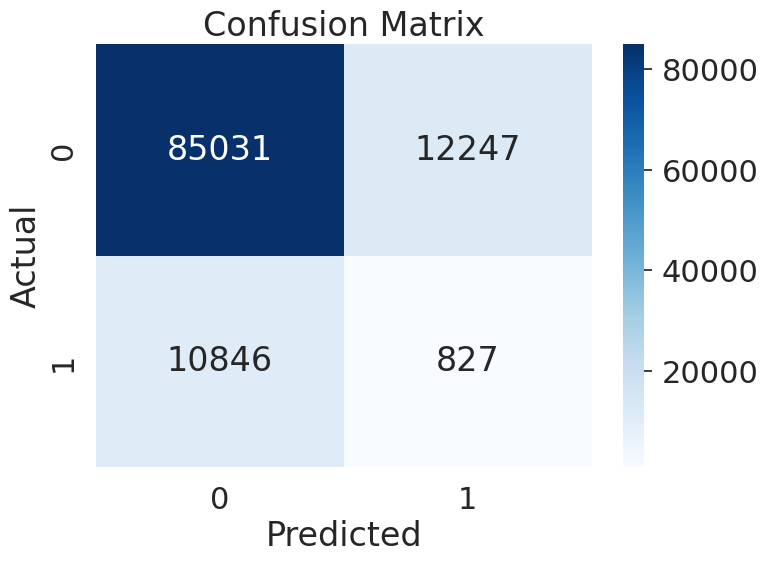

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     97278
           1       0.06      0.07      0.07     11673

    accuracy                           0.79    108951
   macro avg       0.48      0.47      0.47    108951
weighted avg       0.80      0.79      0.79    108951



In [237]:
# Evaluate the model
plot_confusion_matrix(y, y_pred)
print(classification_report(y, y_pred))

cblof_report = classification_report(y, y_pred, output_dict=True)

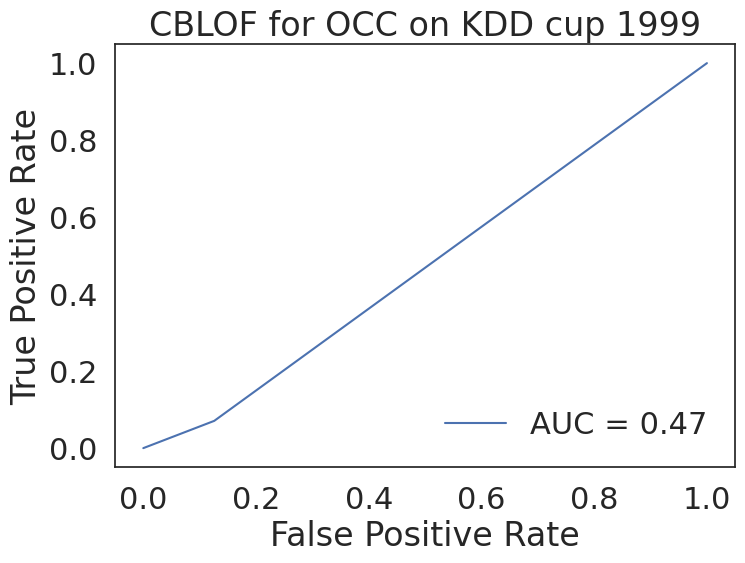

In [238]:
roc_auc_dtl = draw_roc_auc("CBLOF", y, y_pred)
roc_auc_list.append(roc_auc_dtl)

# Final Conclusion

In [239]:
# Sample reports dictionary structure
reports = {
    'Isolation Forest': IF_report,
    'K-Means': KM_report,
    'PCA': PCA_report,
    'DBSCAN': DBSCAN_report,
    'ANN': Autoencoder_report,
    'GMM': gmm_report,
    'HBOS': hbos_report,
    'LOF': lof_report,
    'SVM': svm_report,
    'MCD': mcd_report,
    'CBLOF': cblof_report
}


<ipython-input-240-670f8e98ab88>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_algorithms, y=f1_scores_normal_list, ax=axes[0], palette="Blues_d")
<ipython-input-240-670f8e98ab88>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_algorithms, y=f1_scores_anomaly_list, ax=axes[1], palette="Reds_d")


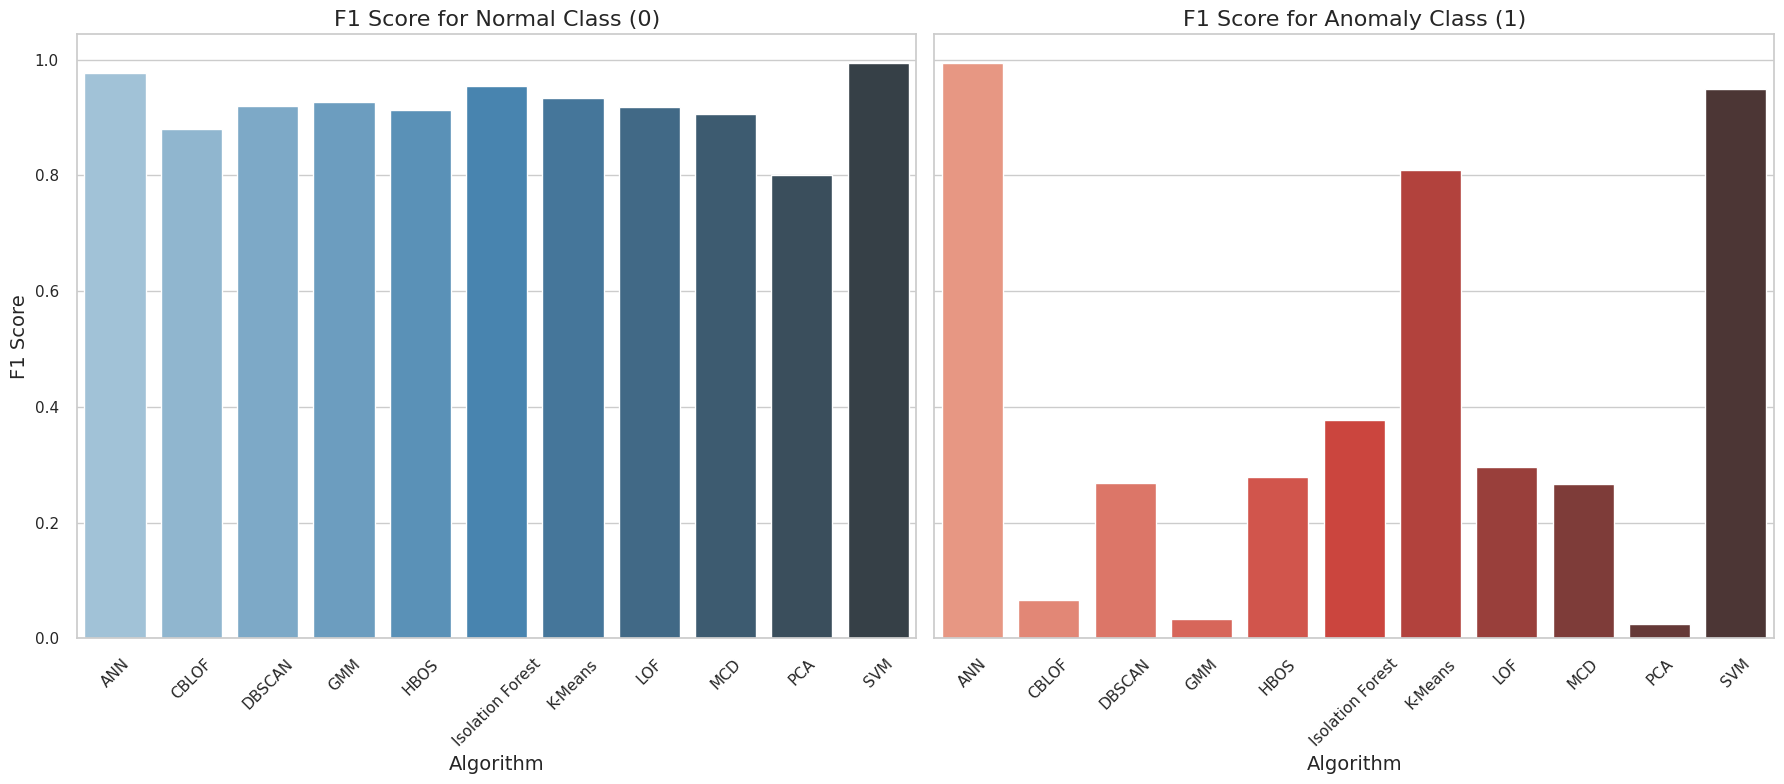

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract F1 scores for each class from the reports
f1_scores_normal = {}
f1_scores_anomaly = {}

for name, report in reports.items():
    f1_scores_normal[name] = report['0']['f1-score']
    f1_scores_anomaly[name] = report['1']['f1-score']

# Convert the extracted scores to lists of tuples sorted by algorithm name
sorted_algorithms = sorted(f1_scores_normal.keys())
f1_scores_normal_list = [f1_scores_normal[alg] for alg in sorted_algorithms]
f1_scores_anomaly_list = [f1_scores_anomaly[alg] for alg in sorted_algorithms]

# Plotting
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Bar plot for Normal Class (0)
sns.barplot(x=sorted_algorithms, y=f1_scores_normal_list, ax=axes[0], palette="Blues_d")
axes[0].set_title('F1 Score for Normal Class (0)', fontsize=16)
axes[0].set_xlabel('Algorithm', fontsize=14)
axes[0].set_ylabel('F1 Score', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for Anomaly Class (1)
sns.barplot(x=sorted_algorithms, y=f1_scores_anomaly_list, ax=axes[1], palette="Reds_d")
axes[1].set_title('F1 Score for Anomaly Class (1)', fontsize=16)
axes[1].set_xlabel('Algorithm', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

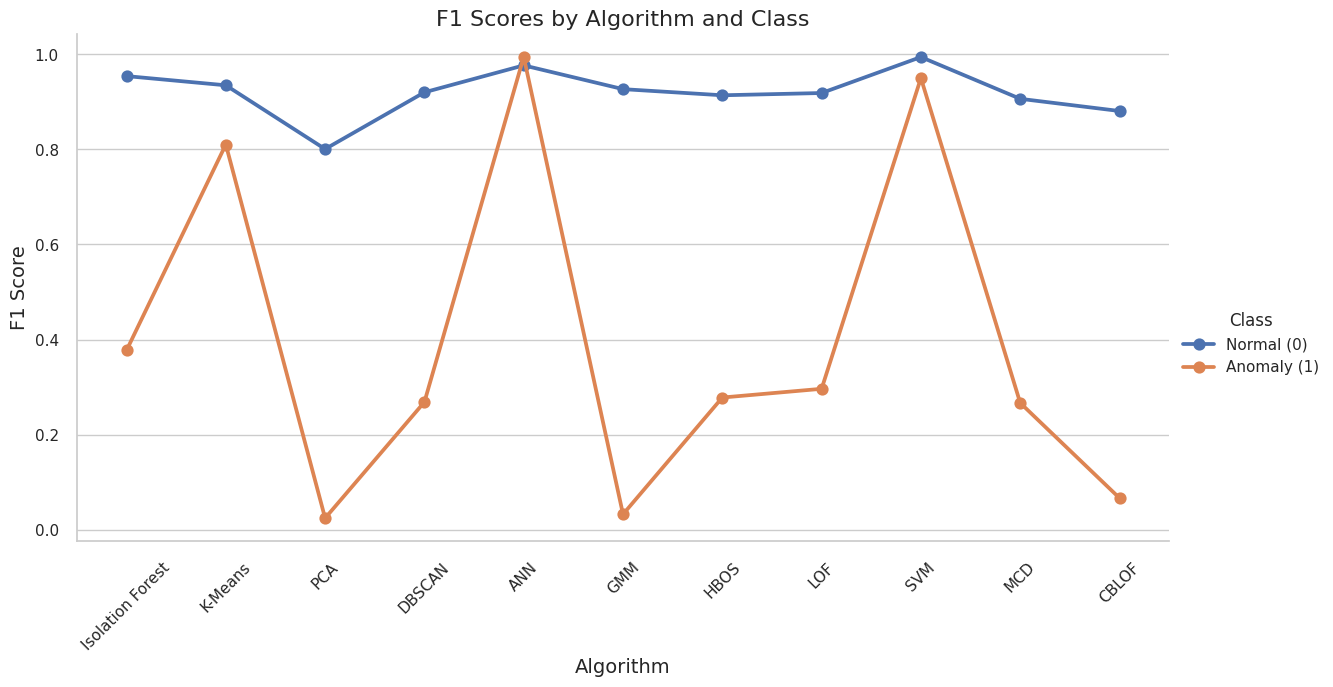

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Extract F1 scores for each class from the reports
data = {'Algorithm': [], 'Class': [], 'F1 Score': []}
for name, report in reports.items():
    data['Algorithm'].append(name)
    data['Class'].append('Normal (0)')
    data['F1 Score'].append(report['0']['f1-score'])
    data['Algorithm'].append(name)
    data['Class'].append('Anomaly (1)')
    data['F1 Score'].append(report['1']['f1-score'])

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))
sns.catplot(data=df, x='Algorithm', y='F1 Score', hue='Class', kind='point', height=6, aspect=2)
plt.xticks(rotation=45)
plt.title('F1 Scores by Algorithm and Class', fontsize=16)
plt.xlabel('Algorithm', fontsize=10)
plt.ylabel('F1 Score', fontsize=10)
plt.show()


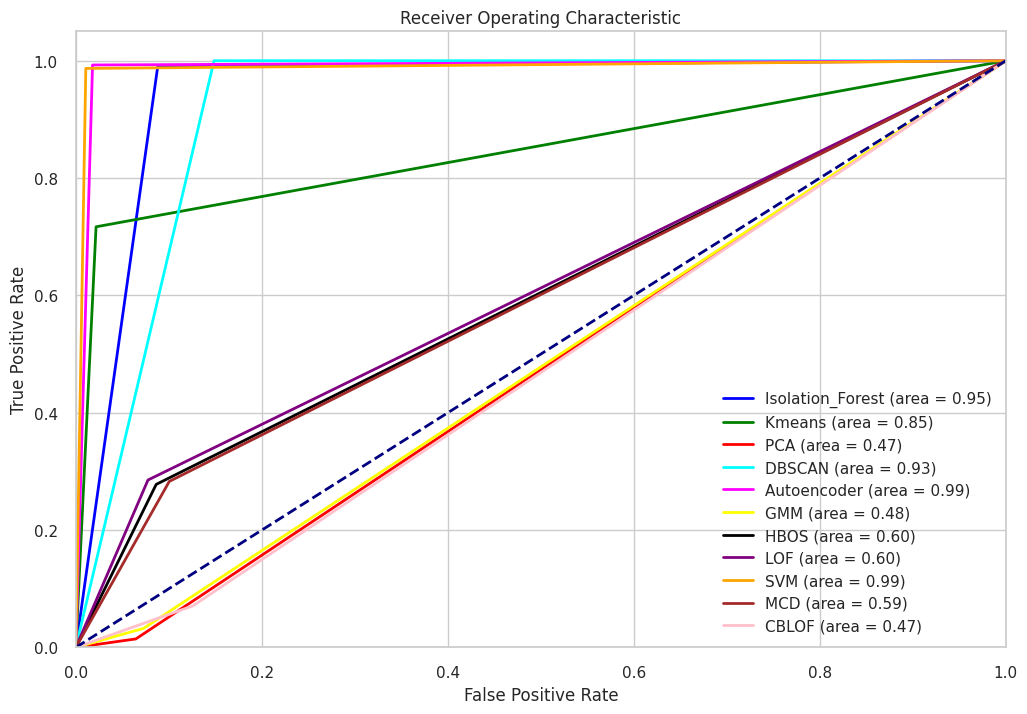

In [242]:
draw_roc_auc_for_all_classifier(roc_auc_list)